<h1><div align="center"><font color= '#0713f0'> <b> MonteCarlo Simulations </b></font></div></h1>

[![Jupyter](https://img.shields.io/badge/Render-nbviewer-000000?style=square&logo=jupyter&logoColor=orange)](https://nbviewer.org/github/EstebanMqz/MonteCarlo-Simulation/blob/main/MC-Simulation.ipynb) [![MonteCarlo-Simulations](https://img.shields.io/badge/MonteCarlo_Simulation-README.md-black?style=square&logo=github&logoColor=black)](https://github.com/EstebanMqz/MonteCarlo-Simulation/tree/main) <br>
[![Creative Commons BY 3.0](https://img.shields.io/badge/License-CC%20BY%203.0-yellow.svg?style=square&logo=creative-commons&logoColor=white)](https://creativecommons.org/licenses/by/3.0/) 

<font color= '#346eeb'> <b>Create environment </b></font> 

1. `conda create --name env_name` - Create environment with [`conda`](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)
2. `python3 -m venv env_path` - Create environment with [`venv`](https://docs.python.org/3/library/venv.html)
3. `pipenv install` - Create environment with [`pipenv`](https://pipenv-es.readthedocs.io/es/latest/basics.html)
4. `direnv edit .envrc` - Create environment with [`direnv`](https://direnv.net/)

<font color= '#4bba2d'> <b>Activate environment </b>: </font> 

1. `conda activate env_name` - Activate environment with [`conda`](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)
2. `source env_path\bin\activate` - Activate environment with [`venv`](https://docs.python.org/3/library/venv.html)
3. `pipenv shell` - Activate environment with [`pipenv`](https://pipenv-es.readthedocs.io/es/latest/basics.html)
4. `direnv allow` - Activate environment with [`direnv`](https://direnv.net/)

<i> Skip to packages installation if you are working in system environment </i><br><br>

---


In [1]:
#Dependencies
import functions as fn 
import visualizations as vs
import data as dt

#Pre-built libraries
import os, glob, subprocess, pipreqs

<i><font color= 'gray'> Install pkgs in requirements.txt: </font> </i>

In [3]:
%%capture
# %pip install -r requirements.txt #1. Isolated: Isolate installation from system/local to setup a venv (current kernel).
!pip install -r requirements.txt #2. Local: Installation of pkgs in global/system Python environment.

<i><font color= 'gray'> Load Modules: </font> </i>

In [4]:
#Libraries 
import numpy as np
import pandas as pd

import IPython.display as d
from IPython.display import HTML
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# pd.set_option('display.float_format', lambda x: '%.4f' % x)

---

<font color= '#346eeb'> <b>Requirements.txt</b> <i>(modules used)</i>: </font>

In [2]:
remote, author, env, ext = str('https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/'), str('EstebanMqz'), str('requirements.txt'), str('*.py')
scripts = glob.glob(ext)
docstring_req = fn.docstring('MonteCarlo-Simulations', env, author, 'CC BY 3.0', remote + env) #Create & write docstrings.
dt.get_requirements(docstring_req, ext) #requirements.txt creation/update.


# -- --------------------------------------------------------------------------------------------------  -- #       
# -- Repository: MonteCarlo-Simulations
# -- Requirements: requirements.txt
# -- Author(s): EstebanMqz
# -- License: CC BY 3.0
# -- Environment: https://github.com/EstebanMqz/MonteCarlo-Simulations/blob/main/requirements.txt
# -- --------------------------------------------------------------------------------------------------  -- #

ipython >= 8.14.0
markdown2 >= 2.4.9
matplotlib >= 3.7.2
numpy >= 1.24.3
pandas >= 2.0.3
tabulate >= 0.9.0
jupyter >= 1.0.0 

scripts: ['data.py', 'functions.py', 'visualizations.py']


<font color= '#f00084'> Create & Write Docstrings in Scripts <i>(.py)</i> </font>

In [5]:
scripts = glob.glob('*.py')
docstrings = [fn.docstring('MonteCarlo-Simulations', scripts[i], author, 'CC BY 3.0', remote + str(scripts[i])) for i in range(len(scripts))]
[dt.write_docstring(docstrings[i], scripts[i]) for i in range(len(scripts))][0]

Succesfully created docstring for: .\data.py
Succesfully created docstring for: .\functions.py
Succesfully created docstring for: .\visualizations.py


---

<div class="alert alert-block alert-info">

This repository illustrates how MonteCarlo calculates crucial decision-making tools from simulations $X \sim f(X)$ like [$E[X]$](README.md#references):

$$E[X] \approx \frac{1}{N} \sum_{i=1}^{N} x_i = \mu_{M.C}$$

<b>$X$</b> = <i>Random Variable from simulations.</i> <br>
<b>$\mu_{M.C}$</b> = <i>Mean of the MonteCarlo Simulations.</i><br>
<b>$N$</b> = <i>No° of Simulations.</i>

[$E[RoI]$](README.md#references) $\&$ probabilities with their density function [$f_X(x)$](README.md#references) $\&$ <i>cumulative distribution</i> [$F_X(x)$](README.md#references):

In this case, with an expected Capital per game in a set of games $(n=100)$ planned to be played in a <i>Casi-no</i>:

$$E[X_1]+ E[X_2] + ... +E[X_n] = \mu_{M.C{_1}} + \mu_{M.C{_2}} + ... + \mu_{M.C_n}$$

<b>$X$</b> = <i>Random Variable from simulations.</i> <br>
<b>$\mu_{M.C}$</b> = <i>Mean of the MonteCarlo Simulations.</i><br>
<b>$N$</b> = <i>No° of Simulations.</i>

#### **Tosing a Coin:** *Simulations for **100** coin tosses games each starting with a Capital of $50.*

There's a game with the following rules in a Casino:<br>
1. Repeatedly toss a fair coin to win a prize until the difference between Heads and Tails is $3$.
2. $\$1$ is the cost for each toss made, and the prize is $\$8$. 

Let's assume the plan is to toss a coin $n=100$ times and we are not going to risk more than $\$50$.<br>
We want to know not only the most prob. outcome but also: <br><br>

#### <span style='color:lightblue'> MonteCarlo Simulations: </span><br>

Calculate <b>$E[X]$, $f(X)$ $\&$ $F(X)$</b> for the games played.

<font size="1.99"><i>There isn't much difference between if simulations $N \geq 10,000$ if decimals are not required.<br>
$1_m$ would be more than enough for $2$ decimal places certainly, but it also depends on the event. </i></font>

In [6]:
initial_capital, bet, n_games, prize, sim  = 50, 1, 100, 8, 10000
df1 = dt.coin_game_sim(initial_capital, bet, n_games, prize, 0, sim).T
df1.head(8)

Sim,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,...,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
3,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
4,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,...,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0,47.0
5,46.0,46.0,55.0,55.0,46.0,46.0,55.0,46.0,46.0,46.0,...,55.0,46.0,46.0,46.0,55.0,46.0,46.0,46.0,46.0,46.0
6,45.0,45.0,54.0,54.0,45.0,45.0,54.0,45.0,45.0,45.0,...,54.0,45.0,45.0,45.0,54.0,45.0,45.0,45.0,45.0,45.0
7,53.0,53.0,53.0,53.0,44.0,44.0,53.0,44.0,44.0,53.0,...,53.0,44.0,44.0,44.0,53.0,44.0,44.0,44.0,44.0,44.0
8,52.0,52.0,52.0,52.0,43.0,43.0,52.0,43.0,43.0,52.0,...,52.0,43.0,43.0,43.0,52.0,43.0,43.0,43.0,43.0,43.0


In [7]:
df1.tail(5)

Sim,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
96,45.0,18.0,45.0,63.0,54.0,45.0,54.0,36.0,63.0,18.0,...,45.0,18.0,54.0,54.0,36.0,45.0,54.0,72.0,45.0,36.0
97,44.0,17.0,44.0,62.0,53.0,53.0,53.0,35.0,62.0,26.0,...,44.0,17.0,53.0,62.0,44.0,44.0,53.0,71.0,53.0,35.0
98,43.0,16.0,43.0,61.0,52.0,52.0,52.0,34.0,61.0,25.0,...,43.0,16.0,52.0,61.0,43.0,43.0,52.0,70.0,52.0,34.0
99,42.0,15.0,42.0,60.0,60.0,51.0,51.0,42.0,60.0,24.0,...,42.0,24.0,51.0,60.0,42.0,51.0,60.0,78.0,51.0,33.0
100,41.0,14.0,41.0,59.0,59.0,50.0,50.0,41.0,59.0,23.0,...,41.0,23.0,50.0,59.0,41.0,50.0,59.0,77.0,50.0,32.0


The Expectancy of Capital [$E[X]$](README.md#references) $\&$ [$E[RoI]$](README.md#references):

In [8]:
EX = pd.DataFrame({'$E[X]$': df1.T.mean(), '$E[RoI]$': df1.T.mean()/initial_capital-1}, index = df1.index)
md_table = fn.tab_md(EX.T)
# fn.README_md(EX.T, False)
md_table #ipynb

|          |   1 |     2 |     3 |     4 |        5 |        6 |         7 |         8 |         9 |        10 |        11 |        12 |        13 |        14 |        15 |        16 |        17 |        18 |        19 |        20 |        21 |        22 |        23 |        24 |       25 |       26 |        27 |        28 |        29 |        30 |        31 |        32 |        33 |        34 |        35 |        36 |        37 |        38 |        39 |        40 |       41 |       42 |        43 |        44 |        45 |        46 |        47 |        48 |        49 |        50 |        51 |        52 |        53 |        54 |        55 |        56 |        57 |        58 |        59 |        60 |        61 |        62 |        63 |        64 |        65 |        66 |        67 |        68 |        69 |        70 |        71 |        72 |        73 |        74 |        75 |        76 |       77 |       78 |       79 |       80 |        81 |        82 |        83 |        84 |        85 |        86 |      87 |      88 |        89 |        90 |        91 |        92 |       93 |       94 |        95 |        96 |        97 |        98 |        99 |       100 |
|----------|-----|-------|-------|-------|----------|----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|----------|----------|----------|----------|-----------|-----------|-----------|-----------|-----------|-----------|---------|---------|-----------|-----------|-----------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|-----------|
| $E[X]$   |  50 | 49    | 48    | 47    | 48.1915  | 47.1915  | 47.8853   | 46.8853   | 47.7294   | 46.7294   | 47.5366   | 46.5366   | 47.2727   | 46.2727   | 47.0664   | 46.0664   | 46.8601   | 45.8601   | 46.6736   | 45.6736   | 46.4124   | 45.4124   | 46.2304   | 45.2304   | 46.0565  | 45.0565  | 45.8376   | 44.8376   | 45.6034   | 44.6034   | 45.3908   | 44.3908   | 45.1017   | 44.1017   | 44.9224   | 43.9224   | 44.7224   | 43.7224   | 44.5476   | 43.5476   | 44.3755  | 43.3755  | 44.1332   | 43.1332   | 43.9467   | 42.9467   | 43.7449   | 42.7449   | 43.5557   | 42.5557   | 43.3404   | 42.3404   | 43.1296   | 42.1296   | 42.9476   | 41.9476   | 42.7872   | 41.7872   | 42.5566   | 41.5566   | 42.3692   | 41.3692   | 42.1863   | 41.1863   | 41.9548   | 40.9548   | 41.7701   | 40.7701   | 41.6142   | 40.6142   | 41.4682   | 40.4682   | 41.2439   | 40.2439   | 41.0772   | 40.0772   | 40.789   | 39.789   | 40.6025  | 39.6025  | 40.3989   | 39.3989   | 40.1809   | 39.1809   | 39.9584   | 38.9584   | 39.78   | 38.78   | 39.5692   | 38.5692   | 39.3467   | 38.3467   | 39.1845  | 38.1845  | 38.9836   | 37.9836   | 38.7566   | 37.7566   | 38.5332   | 37.5332   |
| $E[RoI]$ |   0 | -0.02 | -0.04 | -0.06 | -0.03617 | -0.05617 | -0.042294 | -0.062294 | -0.045412 | -0.065412 | -0.049268 | -0.069268 | -0.054546 | -0.074546 | -0.058672 | -0.078672 | -0.062798 | -0.082798 | -0.066528 | -0.086528 | -0.071752 | -0.091752 | -0.075392 | -0.095392 | -0.07887 | -0.09887 | -0.083248 | -0.103248 | -0.087932 | -0.107932 | -0.092184 | -0.112184 | -0.097966 | -0.117966 | -0.101552 | -0.121552 | -0.105552 | -0.125552 | -0.109048 | -0.129048 | -0.11249 | -0.13249 | -0.117336 | -0.137336 | -0.121066 | -0.141066 | -0.125102 | -0.145102 | -0.128886 | -0.148886 | -0.133192 | -0.153192 | -0.137408 | -0.157408 | -0.141048 | -0.161048 | -0.144256 | -0.164256 | -0.148868 | -0.168868 | -0.152616 | -0.172616 | -0.156274 | -0.176274 | -0.160904 | -0.180904 | -0.164598 | -0.184598 | -0.167716 | -0.187716 | -0.170636 | -0.190636 | -0.175122 | -0.195122 | -0.178456 | -0.198456 | -0.18422 | -0.20422 | -0.18795 | -0.20795 | -0.192022 | -0.212022 | -0.196382 | -0.216382 | -0.200832 | -0.220832 | -0.2044 | -0.2244 | -0.208616 | -0.228616 | -0.213066 | -0.233066 | -0.21631 | -0.23631 | -0.220328 | -0.240328 | -0.224868 | -0.244868 | -0.229336 | -0.249336 |

Figure successfully created / overwritten in ./images/MC_Sim.jpg


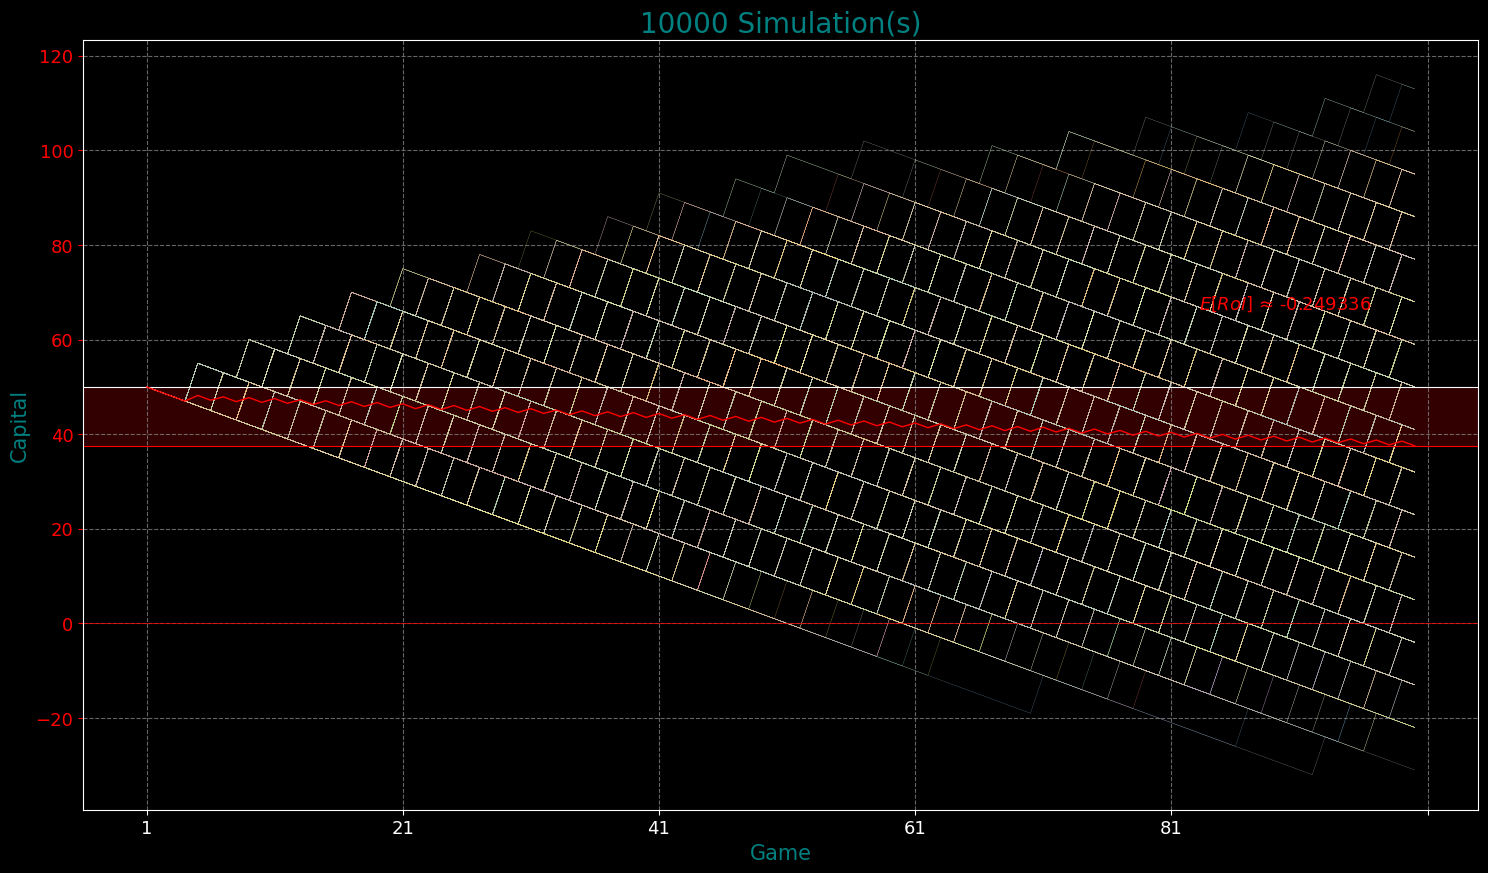

In [9]:
vs.MC_plot(df1, EX, 'Game', 'Capital', 'MC_Sim', 'jpg')

In [10]:
EX_100 = df1.iloc[-1][df1.iloc[-1] <= initial_capital].to_frame(name='$Pr(X≤x)$').sort_values(by='$Pr(X≤x)$', ascending=False)
EX_100.reset_index(drop=True, inplace=True)
print(len(EX_100)/sim, "Ocurrences don't expect to have won any money at the 100th game:")
fn.tab_md(EX_100.T)

0.8101 Ocurrences don't expect to have won any money at the 100th game:


|           |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |   18 |   19 |   20 |   21 |   22 |   23 |   24 |   25 |   26 |   27 |   28 |   29 |   30 |   31 |   32 |   33 |   34 |   35 |   36 |   37 |   38 |   39 |   40 |   41 |   42 |   43 |   44 |   45 |   46 |   47 |   48 |   49 |   50 |   51 |   52 |   53 |   54 |   55 |   56 |   57 |   58 |   59 |   60 |   61 |   62 |   63 |   64 |   65 |   66 |   67 |   68 |   69 |   70 |   71 |   72 |   73 |   74 |   75 |   76 |   77 |   78 |   79 |   80 |   81 |   82 |   83 |   84 |   85 |   86 |   87 |   88 |   89 |   90 |   91 |   92 |   93 |   94 |   95 |   96 |   97 |   98 |   99 |   100 |   101 |   102 |   103 |   104 |   105 |   106 |   107 |   108 |   109 |   110 |   111 |   112 |   113 |   114 |   115 |   116 |   117 |   118 |   119 |   120 |   121 |   122 |   123 |   124 |   125 |   126 |   127 |   128 |   129 |   130 |   131 |   132 |   133 |   134 |   135 |   136 |   137 |   138 |   139 |   140 |   141 |   142 |   143 |   144 |   145 |   146 |   147 |   148 |   149 |   150 |   151 |   152 |   153 |   154 |   155 |   156 |   157 |   158 |   159 |   160 |   161 |   162 |   163 |   164 |   165 |   166 |   167 |   168 |   169 |   170 |   171 |   172 |   173 |   174 |   175 |   176 |   177 |   178 |   179 |   180 |   181 |   182 |   183 |   184 |   185 |   186 |   187 |   188 |   189 |   190 |   191 |   192 |   193 |   194 |   195 |   196 |   197 |   198 |   199 |   200 |   201 |   202 |   203 |   204 |   205 |   206 |   207 |   208 |   209 |   210 |   211 |   212 |   213 |   214 |   215 |   216 |   217 |   218 |   219 |   220 |   221 |   222 |   223 |   224 |   225 |   226 |   227 |   228 |   229 |   230 |   231 |   232 |   233 |   234 |   235 |   236 |   237 |   238 |   239 |   240 |   241 |   242 |   243 |   244 |   245 |   246 |   247 |   248 |   249 |   250 |   251 |   252 |   253 |   254 |   255 |   256 |   257 |   258 |   259 |   260 |   261 |   262 |   263 |   264 |   265 |   266 |   267 |   268 |   269 |   270 |   271 |   272 |   273 |   274 |   275 |   276 |   277 |   278 |   279 |   280 |   281 |   282 |   283 |   284 |   285 |   286 |   287 |   288 |   289 |   290 |   291 |   292 |   293 |   294 |   295 |   296 |   297 |   298 |   299 |   300 |   301 |   302 |   303 |   304 |   305 |   306 |   307 |   308 |   309 |   310 |   311 |   312 |   313 |   314 |   315 |   316 |   317 |   318 |   319 |   320 |   321 |   322 |   323 |   324 |   325 |   326 |   327 |   328 |   329 |   330 |   331 |   332 |   333 |   334 |   335 |   336 |   337 |   338 |   339 |   340 |   341 |   342 |   343 |   344 |   345 |   346 |   347 |   348 |   349 |   350 |   351 |   352 |   353 |   354 |   355 |   356 |   357 |   358 |   359 |   360 |   361 |   362 |   363 |   364 |   365 |   366 |   367 |   368 |   369 |   370 |   371 |   372 |   373 |   374 |   375 |   376 |   377 |   378 |   379 |   380 |   381 |   382 |   383 |   384 |   385 |   386 |   387 |   388 |   389 |   390 |   391 |   392 |   393 |   394 |   395 |   396 |   397 |   398 |   399 |   400 |   401 |   402 |   403 |   404 |   405 |   406 |   407 |   408 |   409 |   410 |   411 |   412 |   413 |   414 |   415 |   416 |   417 |   418 |   419 |   420 |   421 |   422 |   423 |   424 |   425 |   426 |   427 |   428 |   429 |   430 |   431 |   432 |   433 |   434 |   435 |   436 |   437 |   438 |   439 |   440 |   441 |   442 |   443 |   444 |   445 |   446 |   447 |   448 |   449 |   450 |   451 |   452 |   453 |   454 |   455 |   456 |   457 |   458 |   459 |   460 |   461 |   462 |   463 |   464 |   465 |   466 |   467 |   468 |   469 |   470 |   471 |   472 |   473 |   474 |   475 |   476 |   477 |   478 |   479 |   480 |   481 |   482 |   483 |   484 |   485 |   486 |   487 |   488 |   489 |   490 |   491 |   492 |   493 |   494 |   495 |   496 |   497 |   498 |   499 |   500 |   501 |   502 |   503 |   504 |   505 |   506 |   507 |   508 |   509 |   510 |   511 |   512 |   513 |   514 |   515 |   516 |   517 |   518 |   519 |   520 |   521 |   522 |   523 |   524 |   525 |   526 |   527 |   528 |   529 |   530 |   531 |   532 |   533 |   534 |   535 |   536 |   537 |   538 |   539 |   540 |   541 |   542 |   543 |   544 |   545 |   546 |   547 |   548 |   549 |   550 |   551 |   552 |   553 |   554 |   555 |   556 |   557 |   558 |   559 |   560 |   561 |   562 |   563 |   564 |   565 |   566 |   567 |   568 |   569 |   570 |   571 |   572 |   573 |   574 |   575 |   576 |   577 |   578 |   579 |   580 |   581 |   582 |   583 |   584 |   585 |   586 |   587 |   588 |   589 |   590 |   591 |   592 |   593 |   594 |   595 |   596 |   597 |   598 |   599 |   600 |   601 |   602 |   603 |   604 |   605 |   606 |   607 |   608 |   609 |   610 |   611 |   612 |   613 |   614 |   615 |   616 |   617 |   618 |   619 |   620 |   621 |   622 |   623 |   624 |   625 |   626 |   627 |   628 |   629 |   630 |   631 |   632 |   633 |   634 |   635 |   636 |   637 |   638 |   639 |   640 |   641 |   642 |   643 |   644 |   645 |   646 |   647 |   648 |   649 |   650 |   651 |   652 |   653 |   654 |   655 |   656 |   657 |   658 |   659 |   660 |   661 |   662 |   663 |   664 |   665 |   666 |   667 |   668 |   669 |   670 |   671 |   672 |   673 |   674 |   675 |   676 |   677 |   678 |   679 |   680 |   681 |   682 |   683 |   684 |   685 |   686 |   687 |   688 |   689 |   690 |   691 |   692 |   693 |   694 |   695 |   696 |   697 |   698 |   699 |   700 |   701 |   702 |   703 |   704 |   705 |   706 |   707 |   708 |   709 |   710 |   711 |   712 |   713 |   714 |   715 |   716 |   717 |   718 |   719 |   720 |   721 |   722 |   723 |   724 |   725 |   726 |   727 |   728 |   729 |   730 |   731 |   732 |   733 |   734 |   735 |   736 |   737 |   738 |   739 |   740 |   741 |   742 |   743 |   744 |   745 |   746 |   747 |   748 |   749 |   750 |   751 |   752 |   753 |   754 |   755 |   756 |   757 |   758 |   759 |   760 |   761 |   762 |   763 |   764 |   765 |   766 |   767 |   768 |   769 |   770 |   771 |   772 |   773 |   774 |   775 |   776 |   777 |   778 |   779 |   780 |   781 |   782 |   783 |   784 |   785 |   786 |   787 |   788 |   789 |   790 |   791 |   792 |   793 |   794 |   795 |   796 |   797 |   798 |   799 |   800 |   801 |   802 |   803 |   804 |   805 |   806 |   807 |   808 |   809 |   810 |   811 |   812 |   813 |   814 |   815 |   816 |   817 |   818 |   819 |   820 |   821 |   822 |   823 |   824 |   825 |   826 |   827 |   828 |   829 |   830 |   831 |   832 |   833 |   834 |   835 |   836 |   837 |   838 |   839 |   840 |   841 |   842 |   843 |   844 |   845 |   846 |   847 |   848 |   849 |   850 |   851 |   852 |   853 |   854 |   855 |   856 |   857 |   858 |   859 |   860 |   861 |   862 |   863 |   864 |   865 |   866 |   867 |   868 |   869 |   870 |   871 |   872 |   873 |   874 |   875 |   876 |   877 |   878 |   879 |   880 |   881 |   882 |   883 |   884 |   885 |   886 |   887 |   888 |   889 |   890 |   891 |   892 |   893 |   894 |   895 |   896 |   897 |   898 |   899 |   900 |   901 |   902 |   903 |   904 |   905 |   906 |   907 |   908 |   909 |   910 |   911 |   912 |   913 |   914 |   915 |   916 |   917 |   918 |   919 |   920 |   921 |   922 |   923 |   924 |   925 |   926 |   927 |   928 |   929 |   930 |   931 |   932 |   933 |   934 |   935 |   936 |   937 |   938 |   939 |   940 |   941 |   942 |   943 |   944 |   945 |   946 |   947 |   948 |   949 |   950 |   951 |   952 |   953 |   954 |   955 |   956 |   957 |   958 |   959 |   960 |   961 |   962 |   963 |   964 |   965 |   966 |   967 |   968 |   969 |   970 |   971 |   972 |   973 |   974 |   975 |   976 |   977 |   978 |   979 |   980 |   981 |   982 |   983 |   984 |   985 |   986 |   987 |   988 |   989 |   990 |   991 |   992 |   993 |   994 |   995 |   996 |   997 |   998 |   999 |   1000 |   1001 |   1002 |   1003 |   1004 |   1005 |   1006 |   1007 |   1008 |   1009 |   1010 |   1011 |   1012 |   1013 |   1014 |   1015 |   1016 |   1017 |   1018 |   1019 |   1020 |   1021 |   1022 |   1023 |   1024 |   1025 |   1026 |   1027 |   1028 |   1029 |   1030 |   1031 |   1032 |   1033 |   1034 |   1035 |   1036 |   1037 |   1038 |   1039 |   1040 |   1041 |   1042 |   1043 |   1044 |   1045 |   1046 |   1047 |   1048 |   1049 |   1050 |   1051 |   1052 |   1053 |   1054 |   1055 |   1056 |   1057 |   1058 |   1059 |   1060 |   1061 |   1062 |   1063 |   1064 |   1065 |   1066 |   1067 |   1068 |   1069 |   1070 |   1071 |   1072 |   1073 |   1074 |   1075 |   1076 |   1077 |   1078 |   1079 |   1080 |   1081 |   1082 |   1083 |   1084 |   1085 |   1086 |   1087 |   1088 |   1089 |   1090 |   1091 |   1092 |   1093 |   1094 |   1095 |   1096 |   1097 |   1098 |   1099 |   1100 |   1101 |   1102 |   1103 |   1104 |   1105 |   1106 |   1107 |   1108 |   1109 |   1110 |   1111 |   1112 |   1113 |   1114 |   1115 |   1116 |   1117 |   1118 |   1119 |   1120 |   1121 |   1122 |   1123 |   1124 |   1125 |   1126 |   1127 |   1128 |   1129 |   1130 |   1131 |   1132 |   1133 |   1134 |   1135 |   1136 |   1137 |   1138 |   1139 |   1140 |   1141 |   1142 |   1143 |   1144 |   1145 |   1146 |   1147 |   1148 |   1149 |   1150 |   1151 |   1152 |   1153 |   1154 |   1155 |   1156 |   1157 |   1158 |   1159 |   1160 |   1161 |   1162 |   1163 |   1164 |   1165 |   1166 |   1167 |   1168 |   1169 |   1170 |   1171 |   1172 |   1173 |   1174 |   1175 |   1176 |   1177 |   1178 |   1179 |   1180 |   1181 |   1182 |   1183 |   1184 |   1185 |   1186 |   1187 |   1188 |   1189 |   1190 |   1191 |   1192 |   1193 |   1194 |   1195 |   1196 |   1197 |   1198 |   1199 |   1200 |   1201 |   1202 |   1203 |   1204 |   1205 |   1206 |   1207 |   1208 |   1209 |   1210 |   1211 |   1212 |   1213 |   1214 |   1215 |   1216 |   1217 |   1218 |   1219 |   1220 |   1221 |   1222 |   1223 |   1224 |   1225 |   1226 |   1227 |   1228 |   1229 |   1230 |   1231 |   1232 |   1233 |   1234 |   1235 |   1236 |   1237 |   1238 |   1239 |   1240 |   1241 |   1242 |   1243 |   1244 |   1245 |   1246 |   1247 |   1248 |   1249 |   1250 |   1251 |   1252 |   1253 |   1254 |   1255 |   1256 |   1257 |   1258 |   1259 |   1260 |   1261 |   1262 |   1263 |   1264 |   1265 |   1266 |   1267 |   1268 |   1269 |   1270 |   1271 |   1272 |   1273 |   1274 |   1275 |   1276 |   1277 |   1278 |   1279 |   1280 |   1281 |   1282 |   1283 |   1284 |   1285 |   1286 |   1287 |   1288 |   1289 |   1290 |   1291 |   1292 |   1293 |   1294 |   1295 |   1296 |   1297 |   1298 |   1299 |   1300 |   1301 |   1302 |   1303 |   1304 |   1305 |   1306 |   1307 |   1308 |   1309 |   1310 |   1311 |   1312 |   1313 |   1314 |   1315 |   1316 |   1317 |   1318 |   1319 |   1320 |   1321 |   1322 |   1323 |   1324 |   1325 |   1326 |   1327 |   1328 |   1329 |   1330 |   1331 |   1332 |   1333 |   1334 |   1335 |   1336 |   1337 |   1338 |   1339 |   1340 |   1341 |   1342 |   1343 |   1344 |   1345 |   1346 |   1347 |   1348 |   1349 |   1350 |   1351 |   1352 |   1353 |   1354 |   1355 |   1356 |   1357 |   1358 |   1359 |   1360 |   1361 |   1362 |   1363 |   1364 |   1365 |   1366 |   1367 |   1368 |   1369 |   1370 |   1371 |   1372 |   1373 |   1374 |   1375 |   1376 |   1377 |   1378 |   1379 |   1380 |   1381 |   1382 |   1383 |   1384 |   1385 |   1386 |   1387 |   1388 |   1389 |   1390 |   1391 |   1392 |   1393 |   1394 |   1395 |   1396 |   1397 |   1398 |   1399 |   1400 |   1401 |   1402 |   1403 |   1404 |   1405 |   1406 |   1407 |   1408 |   1409 |   1410 |   1411 |   1412 |   1413 |   1414 |   1415 |   1416 |   1417 |   1418 |   1419 |   1420 |   1421 |   1422 |   1423 |   1424 |   1425 |   1426 |   1427 |   1428 |   1429 |   1430 |   1431 |   1432 |   1433 |   1434 |   1435 |   1436 |   1437 |   1438 |   1439 |   1440 |   1441 |   1442 |   1443 |   1444 |   1445 |   1446 |   1447 |   1448 |   1449 |   1450 |   1451 |   1452 |   1453 |   1454 |   1455 |   1456 |   1457 |   1458 |   1459 |   1460 |   1461 |   1462 |   1463 |   1464 |   1465 |   1466 |   1467 |   1468 |   1469 |   1470 |   1471 |   1472 |   1473 |   1474 |   1475 |   1476 |   1477 |   1478 |   1479 |   1480 |   1481 |   1482 |   1483 |   1484 |   1485 |   1486 |   1487 |   1488 |   1489 |   1490 |   1491 |   1492 |   1493 |   1494 |   1495 |   1496 |   1497 |   1498 |   1499 |   1500 |   1501 |   1502 |   1503 |   1504 |   1505 |   1506 |   1507 |   1508 |   1509 |   1510 |   1511 |   1512 |   1513 |   1514 |   1515 |   1516 |   1517 |   1518 |   1519 |   1520 |   1521 |   1522 |   1523 |   1524 |   1525 |   1526 |   1527 |   1528 |   1529 |   1530 |   1531 |   1532 |   1533 |   1534 |   1535 |   1536 |   1537 |   1538 |   1539 |   1540 |   1541 |   1542 |   1543 |   1544 |   1545 |   1546 |   1547 |   1548 |   1549 |   1550 |   1551 |   1552 |   1553 |   1554 |   1555 |   1556 |   1557 |   1558 |   1559 |   1560 |   1561 |   1562 |   1563 |   1564 |   1565 |   1566 |   1567 |   1568 |   1569 |   1570 |   1571 |   1572 |   1573 |   1574 |   1575 |   1576 |   1577 |   1578 |   1579 |   1580 |   1581 |   1582 |   1583 |   1584 |   1585 |   1586 |   1587 |   1588 |   1589 |   1590 |   1591 |   1592 |   1593 |   1594 |   1595 |   1596 |   1597 |   1598 |   1599 |   1600 |   1601 |   1602 |   1603 |   1604 |   1605 |   1606 |   1607 |   1608 |   1609 |   1610 |   1611 |   1612 |   1613 |   1614 |   1615 |   1616 |   1617 |   1618 |   1619 |   1620 |   1621 |   1622 |   1623 |   1624 |   1625 |   1626 |   1627 |   1628 |   1629 |   1630 |   1631 |   1632 |   1633 |   1634 |   1635 |   1636 |   1637 |   1638 |   1639 |   1640 |   1641 |   1642 |   1643 |   1644 |   1645 |   1646 |   1647 |   1648 |   1649 |   1650 |   1651 |   1652 |   1653 |   1654 |   1655 |   1656 |   1657 |   1658 |   1659 |   1660 |   1661 |   1662 |   1663 |   1664 |   1665 |   1666 |   1667 |   1668 |   1669 |   1670 |   1671 |   1672 |   1673 |   1674 |   1675 |   1676 |   1677 |   1678 |   1679 |   1680 |   1681 |   1682 |   1683 |   1684 |   1685 |   1686 |   1687 |   1688 |   1689 |   1690 |   1691 |   1692 |   1693 |   1694 |   1695 |   1696 |   1697 |   1698 |   1699 |   1700 |   1701 |   1702 |   1703 |   1704 |   1705 |   1706 |   1707 |   1708 |   1709 |   1710 |   1711 |   1712 |   1713 |   1714 |   1715 |   1716 |   1717 |   1718 |   1719 |   1720 |   1721 |   1722 |   1723 |   1724 |   1725 |   1726 |   1727 |   1728 |   1729 |   1730 |   1731 |   1732 |   1733 |   1734 |   1735 |   1736 |   1737 |   1738 |   1739 |   1740 |   1741 |   1742 |   1743 |   1744 |   1745 |   1746 |   1747 |   1748 |   1749 |   1750 |   1751 |   1752 |   1753 |   1754 |   1755 |   1756 |   1757 |   1758 |   1759 |   1760 |   1761 |   1762 |   1763 |   1764 |   1765 |   1766 |   1767 |   1768 |   1769 |   1770 |   1771 |   1772 |   1773 |   1774 |   1775 |   1776 |   1777 |   1778 |   1779 |   1780 |   1781 |   1782 |   1783 |   1784 |   1785 |   1786 |   1787 |   1788 |   1789 |   1790 |   1791 |   1792 |   1793 |   1794 |   1795 |   1796 |   1797 |   1798 |   1799 |   1800 |   1801 |   1802 |   1803 |   1804 |   1805 |   1806 |   1807 |   1808 |   1809 |   1810 |   1811 |   1812 |   1813 |   1814 |   1815 |   1816 |   1817 |   1818 |   1819 |   1820 |   1821 |   1822 |   1823 |   1824 |   1825 |   1826 |   1827 |   1828 |   1829 |   1830 |   1831 |   1832 |   1833 |   1834 |   1835 |   1836 |   1837 |   1838 |   1839 |   1840 |   1841 |   1842 |   1843 |   1844 |   1845 |   1846 |   1847 |   1848 |   1849 |   1850 |   1851 |   1852 |   1853 |   1854 |   1855 |   1856 |   1857 |   1858 |   1859 |   1860 |   1861 |   1862 |   1863 |   1864 |   1865 |   1866 |   1867 |   1868 |   1869 |   1870 |   1871 |   1872 |   1873 |   1874 |   1875 |   1876 |   1877 |   1878 |   1879 |   1880 |   1881 |   1882 |   1883 |   1884 |   1885 |   1886 |   1887 |   1888 |   1889 |   1890 |   1891 |   1892 |   1893 |   1894 |   1895 |   1896 |   1897 |   1898 |   1899 |   1900 |   1901 |   1902 |   1903 |   1904 |   1905 |   1906 |   1907 |   1908 |   1909 |   1910 |   1911 |   1912 |   1913 |   1914 |   1915 |   1916 |   1917 |   1918 |   1919 |   1920 |   1921 |   1922 |   1923 |   1924 |   1925 |   1926 |   1927 |   1928 |   1929 |   1930 |   1931 |   1932 |   1933 |   1934 |   1935 |   1936 |   1937 |   1938 |   1939 |   1940 |   1941 |   1942 |   1943 |   1944 |   1945 |   1946 |   1947 |   1948 |   1949 |   1950 |   1951 |   1952 |   1953 |   1954 |   1955 |   1956 |   1957 |   1958 |   1959 |   1960 |   1961 |   1962 |   1963 |   1964 |   1965 |   1966 |   1967 |   1968 |   1969 |   1970 |   1971 |   1972 |   1973 |   1974 |   1975 |   1976 |   1977 |   1978 |   1979 |   1980 |   1981 |   1982 |   1983 |   1984 |   1985 |   1986 |   1987 |   1988 |   1989 |   1990 |   1991 |   1992 |   1993 |   1994 |   1995 |   1996 |   1997 |   1998 |   1999 |   2000 |   2001 |   2002 |   2003 |   2004 |   2005 |   2006 |   2007 |   2008 |   2009 |   2010 |   2011 |   2012 |   2013 |   2014 |   2015 |   2016 |   2017 |   2018 |   2019 |   2020 |   2021 |   2022 |   2023 |   2024 |   2025 |   2026 |   2027 |   2028 |   2029 |   2030 |   2031 |   2032 |   2033 |   2034 |   2035 |   2036 |   2037 |   2038 |   2039 |   2040 |   2041 |   2042 |   2043 |   2044 |   2045 |   2046 |   2047 |   2048 |   2049 |   2050 |   2051 |   2052 |   2053 |   2054 |   2055 |   2056 |   2057 |   2058 |   2059 |   2060 |   2061 |   2062 |   2063 |   2064 |   2065 |   2066 |   2067 |   2068 |   2069 |   2070 |   2071 |   2072 |   2073 |   2074 |   2075 |   2076 |   2077 |   2078 |   2079 |   2080 |   2081 |   2082 |   2083 |   2084 |   2085 |   2086 |   2087 |   2088 |   2089 |   2090 |   2091 |   2092 |   2093 |   2094 |   2095 |   2096 |   2097 |   2098 |   2099 |   2100 |   2101 |   2102 |   2103 |   2104 |   2105 |   2106 |   2107 |   2108 |   2109 |   2110 |   2111 |   2112 |   2113 |   2114 |   2115 |   2116 |   2117 |   2118 |   2119 |   2120 |   2121 |   2122 |   2123 |   2124 |   2125 |   2126 |   2127 |   2128 |   2129 |   2130 |   2131 |   2132 |   2133 |   2134 |   2135 |   2136 |   2137 |   2138 |   2139 |   2140 |   2141 |   2142 |   2143 |   2144 |   2145 |   2146 |   2147 |   2148 |   2149 |   2150 |   2151 |   2152 |   2153 |   2154 |   2155 |   2156 |   2157 |   2158 |   2159 |   2160 |   2161 |   2162 |   2163 |   2164 |   2165 |   2166 |   2167 |   2168 |   2169 |   2170 |   2171 |   2172 |   2173 |   2174 |   2175 |   2176 |   2177 |   2178 |   2179 |   2180 |   2181 |   2182 |   2183 |   2184 |   2185 |   2186 |   2187 |   2188 |   2189 |   2190 |   2191 |   2192 |   2193 |   2194 |   2195 |   2196 |   2197 |   2198 |   2199 |   2200 |   2201 |   2202 |   2203 |   2204 |   2205 |   2206 |   2207 |   2208 |   2209 |   2210 |   2211 |   2212 |   2213 |   2214 |   2215 |   2216 |   2217 |   2218 |   2219 |   2220 |   2221 |   2222 |   2223 |   2224 |   2225 |   2226 |   2227 |   2228 |   2229 |   2230 |   2231 |   2232 |   2233 |   2234 |   2235 |   2236 |   2237 |   2238 |   2239 |   2240 |   2241 |   2242 |   2243 |   2244 |   2245 |   2246 |   2247 |   2248 |   2249 |   2250 |   2251 |   2252 |   2253 |   2254 |   2255 |   2256 |   2257 |   2258 |   2259 |   2260 |   2261 |   2262 |   2263 |   2264 |   2265 |   2266 |   2267 |   2268 |   2269 |   2270 |   2271 |   2272 |   2273 |   2274 |   2275 |   2276 |   2277 |   2278 |   2279 |   2280 |   2281 |   2282 |   2283 |   2284 |   2285 |   2286 |   2287 |   2288 |   2289 |   2290 |   2291 |   2292 |   2293 |   2294 |   2295 |   2296 |   2297 |   2298 |   2299 |   2300 |   2301 |   2302 |   2303 |   2304 |   2305 |   2306 |   2307 |   2308 |   2309 |   2310 |   2311 |   2312 |   2313 |   2314 |   2315 |   2316 |   2317 |   2318 |   2319 |   2320 |   2321 |   2322 |   2323 |   2324 |   2325 |   2326 |   2327 |   2328 |   2329 |   2330 |   2331 |   2332 |   2333 |   2334 |   2335 |   2336 |   2337 |   2338 |   2339 |   2340 |   2341 |   2342 |   2343 |   2344 |   2345 |   2346 |   2347 |   2348 |   2349 |   2350 |   2351 |   2352 |   2353 |   2354 |   2355 |   2356 |   2357 |   2358 |   2359 |   2360 |   2361 |   2362 |   2363 |   2364 |   2365 |   2366 |   2367 |   2368 |   2369 |   2370 |   2371 |   2372 |   2373 |   2374 |   2375 |   2376 |   2377 |   2378 |   2379 |   2380 |   2381 |   2382 |   2383 |   2384 |   2385 |   2386 |   2387 |   2388 |   2389 |   2390 |   2391 |   2392 |   2393 |   2394 |   2395 |   2396 |   2397 |   2398 |   2399 |   2400 |   2401 |   2402 |   2403 |   2404 |   2405 |   2406 |   2407 |   2408 |   2409 |   2410 |   2411 |   2412 |   2413 |   2414 |   2415 |   2416 |   2417 |   2418 |   2419 |   2420 |   2421 |   2422 |   2423 |   2424 |   2425 |   2426 |   2427 |   2428 |   2429 |   2430 |   2431 |   2432 |   2433 |   2434 |   2435 |   2436 |   2437 |   2438 |   2439 |   2440 |   2441 |   2442 |   2443 |   2444 |   2445 |   2446 |   2447 |   2448 |   2449 |   2450 |   2451 |   2452 |   2453 |   2454 |   2455 |   2456 |   2457 |   2458 |   2459 |   2460 |   2461 |   2462 |   2463 |   2464 |   2465 |   2466 |   2467 |   2468 |   2469 |   2470 |   2471 |   2472 |   2473 |   2474 |   2475 |   2476 |   2477 |   2478 |   2479 |   2480 |   2481 |   2482 |   2483 |   2484 |   2485 |   2486 |   2487 |   2488 |   2489 |   2490 |   2491 |   2492 |   2493 |   2494 |   2495 |   2496 |   2497 |   2498 |   2499 |   2500 |   2501 |   2502 |   2503 |   2504 |   2505 |   2506 |   2507 |   2508 |   2509 |   2510 |   2511 |   2512 |   2513 |   2514 |   2515 |   2516 |   2517 |   2518 |   2519 |   2520 |   2521 |   2522 |   2523 |   2524 |   2525 |   2526 |   2527 |   2528 |   2529 |   2530 |   2531 |   2532 |   2533 |   2534 |   2535 |   2536 |   2537 |   2538 |   2539 |   2540 |   2541 |   2542 |   2543 |   2544 |   2545 |   2546 |   2547 |   2548 |   2549 |   2550 |   2551 |   2552 |   2553 |   2554 |   2555 |   2556 |   2557 |   2558 |   2559 |   2560 |   2561 |   2562 |   2563 |   2564 |   2565 |   2566 |   2567 |   2568 |   2569 |   2570 |   2571 |   2572 |   2573 |   2574 |   2575 |   2576 |   2577 |   2578 |   2579 |   2580 |   2581 |   2582 |   2583 |   2584 |   2585 |   2586 |   2587 |   2588 |   2589 |   2590 |   2591 |   2592 |   2593 |   2594 |   2595 |   2596 |   2597 |   2598 |   2599 |   2600 |   2601 |   2602 |   2603 |   2604 |   2605 |   2606 |   2607 |   2608 |   2609 |   2610 |   2611 |   2612 |   2613 |   2614 |   2615 |   2616 |   2617 |   2618 |   2619 |   2620 |   2621 |   2622 |   2623 |   2624 |   2625 |   2626 |   2627 |   2628 |   2629 |   2630 |   2631 |   2632 |   2633 |   2634 |   2635 |   2636 |   2637 |   2638 |   2639 |   2640 |   2641 |   2642 |   2643 |   2644 |   2645 |   2646 |   2647 |   2648 |   2649 |   2650 |   2651 |   2652 |   2653 |   2654 |   2655 |   2656 |   2657 |   2658 |   2659 |   2660 |   2661 |   2662 |   2663 |   2664 |   2665 |   2666 |   2667 |   2668 |   2669 |   2670 |   2671 |   2672 |   2673 |   2674 |   2675 |   2676 |   2677 |   2678 |   2679 |   2680 |   2681 |   2682 |   2683 |   2684 |   2685 |   2686 |   2687 |   2688 |   2689 |   2690 |   2691 |   2692 |   2693 |   2694 |   2695 |   2696 |   2697 |   2698 |   2699 |   2700 |   2701 |   2702 |   2703 |   2704 |   2705 |   2706 |   2707 |   2708 |   2709 |   2710 |   2711 |   2712 |   2713 |   2714 |   2715 |   2716 |   2717 |   2718 |   2719 |   2720 |   2721 |   2722 |   2723 |   2724 |   2725 |   2726 |   2727 |   2728 |   2729 |   2730 |   2731 |   2732 |   2733 |   2734 |   2735 |   2736 |   2737 |   2738 |   2739 |   2740 |   2741 |   2742 |   2743 |   2744 |   2745 |   2746 |   2747 |   2748 |   2749 |   2750 |   2751 |   2752 |   2753 |   2754 |   2755 |   2756 |   2757 |   2758 |   2759 |   2760 |   2761 |   2762 |   2763 |   2764 |   2765 |   2766 |   2767 |   2768 |   2769 |   2770 |   2771 |   2772 |   2773 |   2774 |   2775 |   2776 |   2777 |   2778 |   2779 |   2780 |   2781 |   2782 |   2783 |   2784 |   2785 |   2786 |   2787 |   2788 |   2789 |   2790 |   2791 |   2792 |   2793 |   2794 |   2795 |   2796 |   2797 |   2798 |   2799 |   2800 |   2801 |   2802 |   2803 |   2804 |   2805 |   2806 |   2807 |   2808 |   2809 |   2810 |   2811 |   2812 |   2813 |   2814 |   2815 |   2816 |   2817 |   2818 |   2819 |   2820 |   2821 |   2822 |   2823 |   2824 |   2825 |   2826 |   2827 |   2828 |   2829 |   2830 |   2831 |   2832 |   2833 |   2834 |   2835 |   2836 |   2837 |   2838 |   2839 |   2840 |   2841 |   2842 |   2843 |   2844 |   2845 |   2846 |   2847 |   2848 |   2849 |   2850 |   2851 |   2852 |   2853 |   2854 |   2855 |   2856 |   2857 |   2858 |   2859 |   2860 |   2861 |   2862 |   2863 |   2864 |   2865 |   2866 |   2867 |   2868 |   2869 |   2870 |   2871 |   2872 |   2873 |   2874 |   2875 |   2876 |   2877 |   2878 |   2879 |   2880 |   2881 |   2882 |   2883 |   2884 |   2885 |   2886 |   2887 |   2888 |   2889 |   2890 |   2891 |   2892 |   2893 |   2894 |   2895 |   2896 |   2897 |   2898 |   2899 |   2900 |   2901 |   2902 |   2903 |   2904 |   2905 |   2906 |   2907 |   2908 |   2909 |   2910 |   2911 |   2912 |   2913 |   2914 |   2915 |   2916 |   2917 |   2918 |   2919 |   2920 |   2921 |   2922 |   2923 |   2924 |   2925 |   2926 |   2927 |   2928 |   2929 |   2930 |   2931 |   2932 |   2933 |   2934 |   2935 |   2936 |   2937 |   2938 |   2939 |   2940 |   2941 |   2942 |   2943 |   2944 |   2945 |   2946 |   2947 |   2948 |   2949 |   2950 |   2951 |   2952 |   2953 |   2954 |   2955 |   2956 |   2957 |   2958 |   2959 |   2960 |   2961 |   2962 |   2963 |   2964 |   2965 |   2966 |   2967 |   2968 |   2969 |   2970 |   2971 |   2972 |   2973 |   2974 |   2975 |   2976 |   2977 |   2978 |   2979 |   2980 |   2981 |   2982 |   2983 |   2984 |   2985 |   2986 |   2987 |   2988 |   2989 |   2990 |   2991 |   2992 |   2993 |   2994 |   2995 |   2996 |   2997 |   2998 |   2999 |   3000 |   3001 |   3002 |   3003 |   3004 |   3005 |   3006 |   3007 |   3008 |   3009 |   3010 |   3011 |   3012 |   3013 |   3014 |   3015 |   3016 |   3017 |   3018 |   3019 |   3020 |   3021 |   3022 |   3023 |   3024 |   3025 |   3026 |   3027 |   3028 |   3029 |   3030 |   3031 |   3032 |   3033 |   3034 |   3035 |   3036 |   3037 |   3038 |   3039 |   3040 |   3041 |   3042 |   3043 |   3044 |   3045 |   3046 |   3047 |   3048 |   3049 |   3050 |   3051 |   3052 |   3053 |   3054 |   3055 |   3056 |   3057 |   3058 |   3059 |   3060 |   3061 |   3062 |   3063 |   3064 |   3065 |   3066 |   3067 |   3068 |   3069 |   3070 |   3071 |   3072 |   3073 |   3074 |   3075 |   3076 |   3077 |   3078 |   3079 |   3080 |   3081 |   3082 |   3083 |   3084 |   3085 |   3086 |   3087 |   3088 |   3089 |   3090 |   3091 |   3092 |   3093 |   3094 |   3095 |   3096 |   3097 |   3098 |   3099 |   3100 |   3101 |   3102 |   3103 |   3104 |   3105 |   3106 |   3107 |   3108 |   3109 |   3110 |   3111 |   3112 |   3113 |   3114 |   3115 |   3116 |   3117 |   3118 |   3119 |   3120 |   3121 |   3122 |   3123 |   3124 |   3125 |   3126 |   3127 |   3128 |   3129 |   3130 |   3131 |   3132 |   3133 |   3134 |   3135 |   3136 |   3137 |   3138 |   3139 |   3140 |   3141 |   3142 |   3143 |   3144 |   3145 |   3146 |   3147 |   3148 |   3149 |   3150 |   3151 |   3152 |   3153 |   3154 |   3155 |   3156 |   3157 |   3158 |   3159 |   3160 |   3161 |   3162 |   3163 |   3164 |   3165 |   3166 |   3167 |   3168 |   3169 |   3170 |   3171 |   3172 |   3173 |   3174 |   3175 |   3176 |   3177 |   3178 |   3179 |   3180 |   3181 |   3182 |   3183 |   3184 |   3185 |   3186 |   3187 |   3188 |   3189 |   3190 |   3191 |   3192 |   3193 |   3194 |   3195 |   3196 |   3197 |   3198 |   3199 |   3200 |   3201 |   3202 |   3203 |   3204 |   3205 |   3206 |   3207 |   3208 |   3209 |   3210 |   3211 |   3212 |   3213 |   3214 |   3215 |   3216 |   3217 |   3218 |   3219 |   3220 |   3221 |   3222 |   3223 |   3224 |   3225 |   3226 |   3227 |   3228 |   3229 |   3230 |   3231 |   3232 |   3233 |   3234 |   3235 |   3236 |   3237 |   3238 |   3239 |   3240 |   3241 |   3242 |   3243 |   3244 |   3245 |   3246 |   3247 |   3248 |   3249 |   3250 |   3251 |   3252 |   3253 |   3254 |   3255 |   3256 |   3257 |   3258 |   3259 |   3260 |   3261 |   3262 |   3263 |   3264 |   3265 |   3266 |   3267 |   3268 |   3269 |   3270 |   3271 |   3272 |   3273 |   3274 |   3275 |   3276 |   3277 |   3278 |   3279 |   3280 |   3281 |   3282 |   3283 |   3284 |   3285 |   3286 |   3287 |   3288 |   3289 |   3290 |   3291 |   3292 |   3293 |   3294 |   3295 |   3296 |   3297 |   3298 |   3299 |   3300 |   3301 |   3302 |   3303 |   3304 |   3305 |   3306 |   3307 |   3308 |   3309 |   3310 |   3311 |   3312 |   3313 |   3314 |   3315 |   3316 |   3317 |   3318 |   3319 |   3320 |   3321 |   3322 |   3323 |   3324 |   3325 |   3326 |   3327 |   3328 |   3329 |   3330 |   3331 |   3332 |   3333 |   3334 |   3335 |   3336 |   3337 |   3338 |   3339 |   3340 |   3341 |   3342 |   3343 |   3344 |   3345 |   3346 |   3347 |   3348 |   3349 |   3350 |   3351 |   3352 |   3353 |   3354 |   3355 |   3356 |   3357 |   3358 |   3359 |   3360 |   3361 |   3362 |   3363 |   3364 |   3365 |   3366 |   3367 |   3368 |   3369 |   3370 |   3371 |   3372 |   3373 |   3374 |   3375 |   3376 |   3377 |   3378 |   3379 |   3380 |   3381 |   3382 |   3383 |   3384 |   3385 |   3386 |   3387 |   3388 |   3389 |   3390 |   3391 |   3392 |   3393 |   3394 |   3395 |   3396 |   3397 |   3398 |   3399 |   3400 |   3401 |   3402 |   3403 |   3404 |   3405 |   3406 |   3407 |   3408 |   3409 |   3410 |   3411 |   3412 |   3413 |   3414 |   3415 |   3416 |   3417 |   3418 |   3419 |   3420 |   3421 |   3422 |   3423 |   3424 |   3425 |   3426 |   3427 |   3428 |   3429 |   3430 |   3431 |   3432 |   3433 |   3434 |   3435 |   3436 |   3437 |   3438 |   3439 |   3440 |   3441 |   3442 |   3443 |   3444 |   3445 |   3446 |   3447 |   3448 |   3449 |   3450 |   3451 |   3452 |   3453 |   3454 |   3455 |   3456 |   3457 |   3458 |   3459 |   3460 |   3461 |   3462 |   3463 |   3464 |   3465 |   3466 |   3467 |   3468 |   3469 |   3470 |   3471 |   3472 |   3473 |   3474 |   3475 |   3476 |   3477 |   3478 |   3479 |   3480 |   3481 |   3482 |   3483 |   3484 |   3485 |   3486 |   3487 |   3488 |   3489 |   3490 |   3491 |   3492 |   3493 |   3494 |   3495 |   3496 |   3497 |   3498 |   3499 |   3500 |   3501 |   3502 |   3503 |   3504 |   3505 |   3506 |   3507 |   3508 |   3509 |   3510 |   3511 |   3512 |   3513 |   3514 |   3515 |   3516 |   3517 |   3518 |   3519 |   3520 |   3521 |   3522 |   3523 |   3524 |   3525 |   3526 |   3527 |   3528 |   3529 |   3530 |   3531 |   3532 |   3533 |   3534 |   3535 |   3536 |   3537 |   3538 |   3539 |   3540 |   3541 |   3542 |   3543 |   3544 |   3545 |   3546 |   3547 |   3548 |   3549 |   3550 |   3551 |   3552 |   3553 |   3554 |   3555 |   3556 |   3557 |   3558 |   3559 |   3560 |   3561 |   3562 |   3563 |   3564 |   3565 |   3566 |   3567 |   3568 |   3569 |   3570 |   3571 |   3572 |   3573 |   3574 |   3575 |   3576 |   3577 |   3578 |   3579 |   3580 |   3581 |   3582 |   3583 |   3584 |   3585 |   3586 |   3587 |   3588 |   3589 |   3590 |   3591 |   3592 |   3593 |   3594 |   3595 |   3596 |   3597 |   3598 |   3599 |   3600 |   3601 |   3602 |   3603 |   3604 |   3605 |   3606 |   3607 |   3608 |   3609 |   3610 |   3611 |   3612 |   3613 |   3614 |   3615 |   3616 |   3617 |   3618 |   3619 |   3620 |   3621 |   3622 |   3623 |   3624 |   3625 |   3626 |   3627 |   3628 |   3629 |   3630 |   3631 |   3632 |   3633 |   3634 |   3635 |   3636 |   3637 |   3638 |   3639 |   3640 |   3641 |   3642 |   3643 |   3644 |   3645 |   3646 |   3647 |   3648 |   3649 |   3650 |   3651 |   3652 |   3653 |   3654 |   3655 |   3656 |   3657 |   3658 |   3659 |   3660 |   3661 |   3662 |   3663 |   3664 |   3665 |   3666 |   3667 |   3668 |   3669 |   3670 |   3671 |   3672 |   3673 |   3674 |   3675 |   3676 |   3677 |   3678 |   3679 |   3680 |   3681 |   3682 |   3683 |   3684 |   3685 |   3686 |   3687 |   3688 |   3689 |   3690 |   3691 |   3692 |   3693 |   3694 |   3695 |   3696 |   3697 |   3698 |   3699 |   3700 |   3701 |   3702 |   3703 |   3704 |   3705 |   3706 |   3707 |   3708 |   3709 |   3710 |   3711 |   3712 |   3713 |   3714 |   3715 |   3716 |   3717 |   3718 |   3719 |   3720 |   3721 |   3722 |   3723 |   3724 |   3725 |   3726 |   3727 |   3728 |   3729 |   3730 |   3731 |   3732 |   3733 |   3734 |   3735 |   3736 |   3737 |   3738 |   3739 |   3740 |   3741 |   3742 |   3743 |   3744 |   3745 |   3746 |   3747 |   3748 |   3749 |   3750 |   3751 |   3752 |   3753 |   3754 |   3755 |   3756 |   3757 |   3758 |   3759 |   3760 |   3761 |   3762 |   3763 |   3764 |   3765 |   3766 |   3767 |   3768 |   3769 |   3770 |   3771 |   3772 |   3773 |   3774 |   3775 |   3776 |   3777 |   3778 |   3779 |   3780 |   3781 |   3782 |   3783 |   3784 |   3785 |   3786 |   3787 |   3788 |   3789 |   3790 |   3791 |   3792 |   3793 |   3794 |   3795 |   3796 |   3797 |   3798 |   3799 |   3800 |   3801 |   3802 |   3803 |   3804 |   3805 |   3806 |   3807 |   3808 |   3809 |   3810 |   3811 |   3812 |   3813 |   3814 |   3815 |   3816 |   3817 |   3818 |   3819 |   3820 |   3821 |   3822 |   3823 |   3824 |   3825 |   3826 |   3827 |   3828 |   3829 |   3830 |   3831 |   3832 |   3833 |   3834 |   3835 |   3836 |   3837 |   3838 |   3839 |   3840 |   3841 |   3842 |   3843 |   3844 |   3845 |   3846 |   3847 |   3848 |   3849 |   3850 |   3851 |   3852 |   3853 |   3854 |   3855 |   3856 |   3857 |   3858 |   3859 |   3860 |   3861 |   3862 |   3863 |   3864 |   3865 |   3866 |   3867 |   3868 |   3869 |   3870 |   3871 |   3872 |   3873 |   3874 |   3875 |   3876 |   3877 |   3878 |   3879 |   3880 |   3881 |   3882 |   3883 |   3884 |   3885 |   3886 |   3887 |   3888 |   3889 |   3890 |   3891 |   3892 |   3893 |   3894 |   3895 |   3896 |   3897 |   3898 |   3899 |   3900 |   3901 |   3902 |   3903 |   3904 |   3905 |   3906 |   3907 |   3908 |   3909 |   3910 |   3911 |   3912 |   3913 |   3914 |   3915 |   3916 |   3917 |   3918 |   3919 |   3920 |   3921 |   3922 |   3923 |   3924 |   3925 |   3926 |   3927 |   3928 |   3929 |   3930 |   3931 |   3932 |   3933 |   3934 |   3935 |   3936 |   3937 |   3938 |   3939 |   3940 |   3941 |   3942 |   3943 |   3944 |   3945 |   3946 |   3947 |   3948 |   3949 |   3950 |   3951 |   3952 |   3953 |   3954 |   3955 |   3956 |   3957 |   3958 |   3959 |   3960 |   3961 |   3962 |   3963 |   3964 |   3965 |   3966 |   3967 |   3968 |   3969 |   3970 |   3971 |   3972 |   3973 |   3974 |   3975 |   3976 |   3977 |   3978 |   3979 |   3980 |   3981 |   3982 |   3983 |   3984 |   3985 |   3986 |   3987 |   3988 |   3989 |   3990 |   3991 |   3992 |   3993 |   3994 |   3995 |   3996 |   3997 |   3998 |   3999 |   4000 |   4001 |   4002 |   4003 |   4004 |   4005 |   4006 |   4007 |   4008 |   4009 |   4010 |   4011 |   4012 |   4013 |   4014 |   4015 |   4016 |   4017 |   4018 |   4019 |   4020 |   4021 |   4022 |   4023 |   4024 |   4025 |   4026 |   4027 |   4028 |   4029 |   4030 |   4031 |   4032 |   4033 |   4034 |   4035 |   4036 |   4037 |   4038 |   4039 |   4040 |   4041 |   4042 |   4043 |   4044 |   4045 |   4046 |   4047 |   4048 |   4049 |   4050 |   4051 |   4052 |   4053 |   4054 |   4055 |   4056 |   4057 |   4058 |   4059 |   4060 |   4061 |   4062 |   4063 |   4064 |   4065 |   4066 |   4067 |   4068 |   4069 |   4070 |   4071 |   4072 |   4073 |   4074 |   4075 |   4076 |   4077 |   4078 |   4079 |   4080 |   4081 |   4082 |   4083 |   4084 |   4085 |   4086 |   4087 |   4088 |   4089 |   4090 |   4091 |   4092 |   4093 |   4094 |   4095 |   4096 |   4097 |   4098 |   4099 |   4100 |   4101 |   4102 |   4103 |   4104 |   4105 |   4106 |   4107 |   4108 |   4109 |   4110 |   4111 |   4112 |   4113 |   4114 |   4115 |   4116 |   4117 |   4118 |   4119 |   4120 |   4121 |   4122 |   4123 |   4124 |   4125 |   4126 |   4127 |   4128 |   4129 |   4130 |   4131 |   4132 |   4133 |   4134 |   4135 |   4136 |   4137 |   4138 |   4139 |   4140 |   4141 |   4142 |   4143 |   4144 |   4145 |   4146 |   4147 |   4148 |   4149 |   4150 |   4151 |   4152 |   4153 |   4154 |   4155 |   4156 |   4157 |   4158 |   4159 |   4160 |   4161 |   4162 |   4163 |   4164 |   4165 |   4166 |   4167 |   4168 |   4169 |   4170 |   4171 |   4172 |   4173 |   4174 |   4175 |   4176 |   4177 |   4178 |   4179 |   4180 |   4181 |   4182 |   4183 |   4184 |   4185 |   4186 |   4187 |   4188 |   4189 |   4190 |   4191 |   4192 |   4193 |   4194 |   4195 |   4196 |   4197 |   4198 |   4199 |   4200 |   4201 |   4202 |   4203 |   4204 |   4205 |   4206 |   4207 |   4208 |   4209 |   4210 |   4211 |   4212 |   4213 |   4214 |   4215 |   4216 |   4217 |   4218 |   4219 |   4220 |   4221 |   4222 |   4223 |   4224 |   4225 |   4226 |   4227 |   4228 |   4229 |   4230 |   4231 |   4232 |   4233 |   4234 |   4235 |   4236 |   4237 |   4238 |   4239 |   4240 |   4241 |   4242 |   4243 |   4244 |   4245 |   4246 |   4247 |   4248 |   4249 |   4250 |   4251 |   4252 |   4253 |   4254 |   4255 |   4256 |   4257 |   4258 |   4259 |   4260 |   4261 |   4262 |   4263 |   4264 |   4265 |   4266 |   4267 |   4268 |   4269 |   4270 |   4271 |   4272 |   4273 |   4274 |   4275 |   4276 |   4277 |   4278 |   4279 |   4280 |   4281 |   4282 |   4283 |   4284 |   4285 |   4286 |   4287 |   4288 |   4289 |   4290 |   4291 |   4292 |   4293 |   4294 |   4295 |   4296 |   4297 |   4298 |   4299 |   4300 |   4301 |   4302 |   4303 |   4304 |   4305 |   4306 |   4307 |   4308 |   4309 |   4310 |   4311 |   4312 |   4313 |   4314 |   4315 |   4316 |   4317 |   4318 |   4319 |   4320 |   4321 |   4322 |   4323 |   4324 |   4325 |   4326 |   4327 |   4328 |   4329 |   4330 |   4331 |   4332 |   4333 |   4334 |   4335 |   4336 |   4337 |   4338 |   4339 |   4340 |   4341 |   4342 |   4343 |   4344 |   4345 |   4346 |   4347 |   4348 |   4349 |   4350 |   4351 |   4352 |   4353 |   4354 |   4355 |   4356 |   4357 |   4358 |   4359 |   4360 |   4361 |   4362 |   4363 |   4364 |   4365 |   4366 |   4367 |   4368 |   4369 |   4370 |   4371 |   4372 |   4373 |   4374 |   4375 |   4376 |   4377 |   4378 |   4379 |   4380 |   4381 |   4382 |   4383 |   4384 |   4385 |   4386 |   4387 |   4388 |   4389 |   4390 |   4391 |   4392 |   4393 |   4394 |   4395 |   4396 |   4397 |   4398 |   4399 |   4400 |   4401 |   4402 |   4403 |   4404 |   4405 |   4406 |   4407 |   4408 |   4409 |   4410 |   4411 |   4412 |   4413 |   4414 |   4415 |   4416 |   4417 |   4418 |   4419 |   4420 |   4421 |   4422 |   4423 |   4424 |   4425 |   4426 |   4427 |   4428 |   4429 |   4430 |   4431 |   4432 |   4433 |   4434 |   4435 |   4436 |   4437 |   4438 |   4439 |   4440 |   4441 |   4442 |   4443 |   4444 |   4445 |   4446 |   4447 |   4448 |   4449 |   4450 |   4451 |   4452 |   4453 |   4454 |   4455 |   4456 |   4457 |   4458 |   4459 |   4460 |   4461 |   4462 |   4463 |   4464 |   4465 |   4466 |   4467 |   4468 |   4469 |   4470 |   4471 |   4472 |   4473 |   4474 |   4475 |   4476 |   4477 |   4478 |   4479 |   4480 |   4481 |   4482 |   4483 |   4484 |   4485 |   4486 |   4487 |   4488 |   4489 |   4490 |   4491 |   4492 |   4493 |   4494 |   4495 |   4496 |   4497 |   4498 |   4499 |   4500 |   4501 |   4502 |   4503 |   4504 |   4505 |   4506 |   4507 |   4508 |   4509 |   4510 |   4511 |   4512 |   4513 |   4514 |   4515 |   4516 |   4517 |   4518 |   4519 |   4520 |   4521 |   4522 |   4523 |   4524 |   4525 |   4526 |   4527 |   4528 |   4529 |   4530 |   4531 |   4532 |   4533 |   4534 |   4535 |   4536 |   4537 |   4538 |   4539 |   4540 |   4541 |   4542 |   4543 |   4544 |   4545 |   4546 |   4547 |   4548 |   4549 |   4550 |   4551 |   4552 |   4553 |   4554 |   4555 |   4556 |   4557 |   4558 |   4559 |   4560 |   4561 |   4562 |   4563 |   4564 |   4565 |   4566 |   4567 |   4568 |   4569 |   4570 |   4571 |   4572 |   4573 |   4574 |   4575 |   4576 |   4577 |   4578 |   4579 |   4580 |   4581 |   4582 |   4583 |   4584 |   4585 |   4586 |   4587 |   4588 |   4589 |   4590 |   4591 |   4592 |   4593 |   4594 |   4595 |   4596 |   4597 |   4598 |   4599 |   4600 |   4601 |   4602 |   4603 |   4604 |   4605 |   4606 |   4607 |   4608 |   4609 |   4610 |   4611 |   4612 |   4613 |   4614 |   4615 |   4616 |   4617 |   4618 |   4619 |   4620 |   4621 |   4622 |   4623 |   4624 |   4625 |   4626 |   4627 |   4628 |   4629 |   4630 |   4631 |   4632 |   4633 |   4634 |   4635 |   4636 |   4637 |   4638 |   4639 |   4640 |   4641 |   4642 |   4643 |   4644 |   4645 |   4646 |   4647 |   4648 |   4649 |   4650 |   4651 |   4652 |   4653 |   4654 |   4655 |   4656 |   4657 |   4658 |   4659 |   4660 |   4661 |   4662 |   4663 |   4664 |   4665 |   4666 |   4667 |   4668 |   4669 |   4670 |   4671 |   4672 |   4673 |   4674 |   4675 |   4676 |   4677 |   4678 |   4679 |   4680 |   4681 |   4682 |   4683 |   4684 |   4685 |   4686 |   4687 |   4688 |   4689 |   4690 |   4691 |   4692 |   4693 |   4694 |   4695 |   4696 |   4697 |   4698 |   4699 |   4700 |   4701 |   4702 |   4703 |   4704 |   4705 |   4706 |   4707 |   4708 |   4709 |   4710 |   4711 |   4712 |   4713 |   4714 |   4715 |   4716 |   4717 |   4718 |   4719 |   4720 |   4721 |   4722 |   4723 |   4724 |   4725 |   4726 |   4727 |   4728 |   4729 |   4730 |   4731 |   4732 |   4733 |   4734 |   4735 |   4736 |   4737 |   4738 |   4739 |   4740 |   4741 |   4742 |   4743 |   4744 |   4745 |   4746 |   4747 |   4748 |   4749 |   4750 |   4751 |   4752 |   4753 |   4754 |   4755 |   4756 |   4757 |   4758 |   4759 |   4760 |   4761 |   4762 |   4763 |   4764 |   4765 |   4766 |   4767 |   4768 |   4769 |   4770 |   4771 |   4772 |   4773 |   4774 |   4775 |   4776 |   4777 |   4778 |   4779 |   4780 |   4781 |   4782 |   4783 |   4784 |   4785 |   4786 |   4787 |   4788 |   4789 |   4790 |   4791 |   4792 |   4793 |   4794 |   4795 |   4796 |   4797 |   4798 |   4799 |   4800 |   4801 |   4802 |   4803 |   4804 |   4805 |   4806 |   4807 |   4808 |   4809 |   4810 |   4811 |   4812 |   4813 |   4814 |   4815 |   4816 |   4817 |   4818 |   4819 |   4820 |   4821 |   4822 |   4823 |   4824 |   4825 |   4826 |   4827 |   4828 |   4829 |   4830 |   4831 |   4832 |   4833 |   4834 |   4835 |   4836 |   4837 |   4838 |   4839 |   4840 |   4841 |   4842 |   4843 |   4844 |   4845 |   4846 |   4847 |   4848 |   4849 |   4850 |   4851 |   4852 |   4853 |   4854 |   4855 |   4856 |   4857 |   4858 |   4859 |   4860 |   4861 |   4862 |   4863 |   4864 |   4865 |   4866 |   4867 |   4868 |   4869 |   4870 |   4871 |   4872 |   4873 |   4874 |   4875 |   4876 |   4877 |   4878 |   4879 |   4880 |   4881 |   4882 |   4883 |   4884 |   4885 |   4886 |   4887 |   4888 |   4889 |   4890 |   4891 |   4892 |   4893 |   4894 |   4895 |   4896 |   4897 |   4898 |   4899 |   4900 |   4901 |   4902 |   4903 |   4904 |   4905 |   4906 |   4907 |   4908 |   4909 |   4910 |   4911 |   4912 |   4913 |   4914 |   4915 |   4916 |   4917 |   4918 |   4919 |   4920 |   4921 |   4922 |   4923 |   4924 |   4925 |   4926 |   4927 |   4928 |   4929 |   4930 |   4931 |   4932 |   4933 |   4934 |   4935 |   4936 |   4937 |   4938 |   4939 |   4940 |   4941 |   4942 |   4943 |   4944 |   4945 |   4946 |   4947 |   4948 |   4949 |   4950 |   4951 |   4952 |   4953 |   4954 |   4955 |   4956 |   4957 |   4958 |   4959 |   4960 |   4961 |   4962 |   4963 |   4964 |   4965 |   4966 |   4967 |   4968 |   4969 |   4970 |   4971 |   4972 |   4973 |   4974 |   4975 |   4976 |   4977 |   4978 |   4979 |   4980 |   4981 |   4982 |   4983 |   4984 |   4985 |   4986 |   4987 |   4988 |   4989 |   4990 |   4991 |   4992 |   4993 |   4994 |   4995 |   4996 |   4997 |   4998 |   4999 |   5000 |   5001 |   5002 |   5003 |   5004 |   5005 |   5006 |   5007 |   5008 |   5009 |   5010 |   5011 |   5012 |   5013 |   5014 |   5015 |   5016 |   5017 |   5018 |   5019 |   5020 |   5021 |   5022 |   5023 |   5024 |   5025 |   5026 |   5027 |   5028 |   5029 |   5030 |   5031 |   5032 |   5033 |   5034 |   5035 |   5036 |   5037 |   5038 |   5039 |   5040 |   5041 |   5042 |   5043 |   5044 |   5045 |   5046 |   5047 |   5048 |   5049 |   5050 |   5051 |   5052 |   5053 |   5054 |   5055 |   5056 |   5057 |   5058 |   5059 |   5060 |   5061 |   5062 |   5063 |   5064 |   5065 |   5066 |   5067 |   5068 |   5069 |   5070 |   5071 |   5072 |   5073 |   5074 |   5075 |   5076 |   5077 |   5078 |   5079 |   5080 |   5081 |   5082 |   5083 |   5084 |   5085 |   5086 |   5087 |   5088 |   5089 |   5090 |   5091 |   5092 |   5093 |   5094 |   5095 |   5096 |   5097 |   5098 |   5099 |   5100 |   5101 |   5102 |   5103 |   5104 |   5105 |   5106 |   5107 |   5108 |   5109 |   5110 |   5111 |   5112 |   5113 |   5114 |   5115 |   5116 |   5117 |   5118 |   5119 |   5120 |   5121 |   5122 |   5123 |   5124 |   5125 |   5126 |   5127 |   5128 |   5129 |   5130 |   5131 |   5132 |   5133 |   5134 |   5135 |   5136 |   5137 |   5138 |   5139 |   5140 |   5141 |   5142 |   5143 |   5144 |   5145 |   5146 |   5147 |   5148 |   5149 |   5150 |   5151 |   5152 |   5153 |   5154 |   5155 |   5156 |   5157 |   5158 |   5159 |   5160 |   5161 |   5162 |   5163 |   5164 |   5165 |   5166 |   5167 |   5168 |   5169 |   5170 |   5171 |   5172 |   5173 |   5174 |   5175 |   5176 |   5177 |   5178 |   5179 |   5180 |   5181 |   5182 |   5183 |   5184 |   5185 |   5186 |   5187 |   5188 |   5189 |   5190 |   5191 |   5192 |   5193 |   5194 |   5195 |   5196 |   5197 |   5198 |   5199 |   5200 |   5201 |   5202 |   5203 |   5204 |   5205 |   5206 |   5207 |   5208 |   5209 |   5210 |   5211 |   5212 |   5213 |   5214 |   5215 |   5216 |   5217 |   5218 |   5219 |   5220 |   5221 |   5222 |   5223 |   5224 |   5225 |   5226 |   5227 |   5228 |   5229 |   5230 |   5231 |   5232 |   5233 |   5234 |   5235 |   5236 |   5237 |   5238 |   5239 |   5240 |   5241 |   5242 |   5243 |   5244 |   5245 |   5246 |   5247 |   5248 |   5249 |   5250 |   5251 |   5252 |   5253 |   5254 |   5255 |   5256 |   5257 |   5258 |   5259 |   5260 |   5261 |   5262 |   5263 |   5264 |   5265 |   5266 |   5267 |   5268 |   5269 |   5270 |   5271 |   5272 |   5273 |   5274 |   5275 |   5276 |   5277 |   5278 |   5279 |   5280 |   5281 |   5282 |   5283 |   5284 |   5285 |   5286 |   5287 |   5288 |   5289 |   5290 |   5291 |   5292 |   5293 |   5294 |   5295 |   5296 |   5297 |   5298 |   5299 |   5300 |   5301 |   5302 |   5303 |   5304 |   5305 |   5306 |   5307 |   5308 |   5309 |   5310 |   5311 |   5312 |   5313 |   5314 |   5315 |   5316 |   5317 |   5318 |   5319 |   5320 |   5321 |   5322 |   5323 |   5324 |   5325 |   5326 |   5327 |   5328 |   5329 |   5330 |   5331 |   5332 |   5333 |   5334 |   5335 |   5336 |   5337 |   5338 |   5339 |   5340 |   5341 |   5342 |   5343 |   5344 |   5345 |   5346 |   5347 |   5348 |   5349 |   5350 |   5351 |   5352 |   5353 |   5354 |   5355 |   5356 |   5357 |   5358 |   5359 |   5360 |   5361 |   5362 |   5363 |   5364 |   5365 |   5366 |   5367 |   5368 |   5369 |   5370 |   5371 |   5372 |   5373 |   5374 |   5375 |   5376 |   5377 |   5378 |   5379 |   5380 |   5381 |   5382 |   5383 |   5384 |   5385 |   5386 |   5387 |   5388 |   5389 |   5390 |   5391 |   5392 |   5393 |   5394 |   5395 |   5396 |   5397 |   5398 |   5399 |   5400 |   5401 |   5402 |   5403 |   5404 |   5405 |   5406 |   5407 |   5408 |   5409 |   5410 |   5411 |   5412 |   5413 |   5414 |   5415 |   5416 |   5417 |   5418 |   5419 |   5420 |   5421 |   5422 |   5423 |   5424 |   5425 |   5426 |   5427 |   5428 |   5429 |   5430 |   5431 |   5432 |   5433 |   5434 |   5435 |   5436 |   5437 |   5438 |   5439 |   5440 |   5441 |   5442 |   5443 |   5444 |   5445 |   5446 |   5447 |   5448 |   5449 |   5450 |   5451 |   5452 |   5453 |   5454 |   5455 |   5456 |   5457 |   5458 |   5459 |   5460 |   5461 |   5462 |   5463 |   5464 |   5465 |   5466 |   5467 |   5468 |   5469 |   5470 |   5471 |   5472 |   5473 |   5474 |   5475 |   5476 |   5477 |   5478 |   5479 |   5480 |   5481 |   5482 |   5483 |   5484 |   5485 |   5486 |   5487 |   5488 |   5489 |   5490 |   5491 |   5492 |   5493 |   5494 |   5495 |   5496 |   5497 |   5498 |   5499 |   5500 |   5501 |   5502 |   5503 |   5504 |   5505 |   5506 |   5507 |   5508 |   5509 |   5510 |   5511 |   5512 |   5513 |   5514 |   5515 |   5516 |   5517 |   5518 |   5519 |   5520 |   5521 |   5522 |   5523 |   5524 |   5525 |   5526 |   5527 |   5528 |   5529 |   5530 |   5531 |   5532 |   5533 |   5534 |   5535 |   5536 |   5537 |   5538 |   5539 |   5540 |   5541 |   5542 |   5543 |   5544 |   5545 |   5546 |   5547 |   5548 |   5549 |   5550 |   5551 |   5552 |   5553 |   5554 |   5555 |   5556 |   5557 |   5558 |   5559 |   5560 |   5561 |   5562 |   5563 |   5564 |   5565 |   5566 |   5567 |   5568 |   5569 |   5570 |   5571 |   5572 |   5573 |   5574 |   5575 |   5576 |   5577 |   5578 |   5579 |   5580 |   5581 |   5582 |   5583 |   5584 |   5585 |   5586 |   5587 |   5588 |   5589 |   5590 |   5591 |   5592 |   5593 |   5594 |   5595 |   5596 |   5597 |   5598 |   5599 |   5600 |   5601 |   5602 |   5603 |   5604 |   5605 |   5606 |   5607 |   5608 |   5609 |   5610 |   5611 |   5612 |   5613 |   5614 |   5615 |   5616 |   5617 |   5618 |   5619 |   5620 |   5621 |   5622 |   5623 |   5624 |   5625 |   5626 |   5627 |   5628 |   5629 |   5630 |   5631 |   5632 |   5633 |   5634 |   5635 |   5636 |   5637 |   5638 |   5639 |   5640 |   5641 |   5642 |   5643 |   5644 |   5645 |   5646 |   5647 |   5648 |   5649 |   5650 |   5651 |   5652 |   5653 |   5654 |   5655 |   5656 |   5657 |   5658 |   5659 |   5660 |   5661 |   5662 |   5663 |   5664 |   5665 |   5666 |   5667 |   5668 |   5669 |   5670 |   5671 |   5672 |   5673 |   5674 |   5675 |   5676 |   5677 |   5678 |   5679 |   5680 |   5681 |   5682 |   5683 |   5684 |   5685 |   5686 |   5687 |   5688 |   5689 |   5690 |   5691 |   5692 |   5693 |   5694 |   5695 |   5696 |   5697 |   5698 |   5699 |   5700 |   5701 |   5702 |   5703 |   5704 |   5705 |   5706 |   5707 |   5708 |   5709 |   5710 |   5711 |   5712 |   5713 |   5714 |   5715 |   5716 |   5717 |   5718 |   5719 |   5720 |   5721 |   5722 |   5723 |   5724 |   5725 |   5726 |   5727 |   5728 |   5729 |   5730 |   5731 |   5732 |   5733 |   5734 |   5735 |   5736 |   5737 |   5738 |   5739 |   5740 |   5741 |   5742 |   5743 |   5744 |   5745 |   5746 |   5747 |   5748 |   5749 |   5750 |   5751 |   5752 |   5753 |   5754 |   5755 |   5756 |   5757 |   5758 |   5759 |   5760 |   5761 |   5762 |   5763 |   5764 |   5765 |   5766 |   5767 |   5768 |   5769 |   5770 |   5771 |   5772 |   5773 |   5774 |   5775 |   5776 |   5777 |   5778 |   5779 |   5780 |   5781 |   5782 |   5783 |   5784 |   5785 |   5786 |   5787 |   5788 |   5789 |   5790 |   5791 |   5792 |   5793 |   5794 |   5795 |   5796 |   5797 |   5798 |   5799 |   5800 |   5801 |   5802 |   5803 |   5804 |   5805 |   5806 |   5807 |   5808 |   5809 |   5810 |   5811 |   5812 |   5813 |   5814 |   5815 |   5816 |   5817 |   5818 |   5819 |   5820 |   5821 |   5822 |   5823 |   5824 |   5825 |   5826 |   5827 |   5828 |   5829 |   5830 |   5831 |   5832 |   5833 |   5834 |   5835 |   5836 |   5837 |   5838 |   5839 |   5840 |   5841 |   5842 |   5843 |   5844 |   5845 |   5846 |   5847 |   5848 |   5849 |   5850 |   5851 |   5852 |   5853 |   5854 |   5855 |   5856 |   5857 |   5858 |   5859 |   5860 |   5861 |   5862 |   5863 |   5864 |   5865 |   5866 |   5867 |   5868 |   5869 |   5870 |   5871 |   5872 |   5873 |   5874 |   5875 |   5876 |   5877 |   5878 |   5879 |   5880 |   5881 |   5882 |   5883 |   5884 |   5885 |   5886 |   5887 |   5888 |   5889 |   5890 |   5891 |   5892 |   5893 |   5894 |   5895 |   5896 |   5897 |   5898 |   5899 |   5900 |   5901 |   5902 |   5903 |   5904 |   5905 |   5906 |   5907 |   5908 |   5909 |   5910 |   5911 |   5912 |   5913 |   5914 |   5915 |   5916 |   5917 |   5918 |   5919 |   5920 |   5921 |   5922 |   5923 |   5924 |   5925 |   5926 |   5927 |   5928 |   5929 |   5930 |   5931 |   5932 |   5933 |   5934 |   5935 |   5936 |   5937 |   5938 |   5939 |   5940 |   5941 |   5942 |   5943 |   5944 |   5945 |   5946 |   5947 |   5948 |   5949 |   5950 |   5951 |   5952 |   5953 |   5954 |   5955 |   5956 |   5957 |   5958 |   5959 |   5960 |   5961 |   5962 |   5963 |   5964 |   5965 |   5966 |   5967 |   5968 |   5969 |   5970 |   5971 |   5972 |   5973 |   5974 |   5975 |   5976 |   5977 |   5978 |   5979 |   5980 |   5981 |   5982 |   5983 |   5984 |   5985 |   5986 |   5987 |   5988 |   5989 |   5990 |   5991 |   5992 |   5993 |   5994 |   5995 |   5996 |   5997 |   5998 |   5999 |   6000 |   6001 |   6002 |   6003 |   6004 |   6005 |   6006 |   6007 |   6008 |   6009 |   6010 |   6011 |   6012 |   6013 |   6014 |   6015 |   6016 |   6017 |   6018 |   6019 |   6020 |   6021 |   6022 |   6023 |   6024 |   6025 |   6026 |   6027 |   6028 |   6029 |   6030 |   6031 |   6032 |   6033 |   6034 |   6035 |   6036 |   6037 |   6038 |   6039 |   6040 |   6041 |   6042 |   6043 |   6044 |   6045 |   6046 |   6047 |   6048 |   6049 |   6050 |   6051 |   6052 |   6053 |   6054 |   6055 |   6056 |   6057 |   6058 |   6059 |   6060 |   6061 |   6062 |   6063 |   6064 |   6065 |   6066 |   6067 |   6068 |   6069 |   6070 |   6071 |   6072 |   6073 |   6074 |   6075 |   6076 |   6077 |   6078 |   6079 |   6080 |   6081 |   6082 |   6083 |   6084 |   6085 |   6086 |   6087 |   6088 |   6089 |   6090 |   6091 |   6092 |   6093 |   6094 |   6095 |   6096 |   6097 |   6098 |   6099 |   6100 |   6101 |   6102 |   6103 |   6104 |   6105 |   6106 |   6107 |   6108 |   6109 |   6110 |   6111 |   6112 |   6113 |   6114 |   6115 |   6116 |   6117 |   6118 |   6119 |   6120 |   6121 |   6122 |   6123 |   6124 |   6125 |   6126 |   6127 |   6128 |   6129 |   6130 |   6131 |   6132 |   6133 |   6134 |   6135 |   6136 |   6137 |   6138 |   6139 |   6140 |   6141 |   6142 |   6143 |   6144 |   6145 |   6146 |   6147 |   6148 |   6149 |   6150 |   6151 |   6152 |   6153 |   6154 |   6155 |   6156 |   6157 |   6158 |   6159 |   6160 |   6161 |   6162 |   6163 |   6164 |   6165 |   6166 |   6167 |   6168 |   6169 |   6170 |   6171 |   6172 |   6173 |   6174 |   6175 |   6176 |   6177 |   6178 |   6179 |   6180 |   6181 |   6182 |   6183 |   6184 |   6185 |   6186 |   6187 |   6188 |   6189 |   6190 |   6191 |   6192 |   6193 |   6194 |   6195 |   6196 |   6197 |   6198 |   6199 |   6200 |   6201 |   6202 |   6203 |   6204 |   6205 |   6206 |   6207 |   6208 |   6209 |   6210 |   6211 |   6212 |   6213 |   6214 |   6215 |   6216 |   6217 |   6218 |   6219 |   6220 |   6221 |   6222 |   6223 |   6224 |   6225 |   6226 |   6227 |   6228 |   6229 |   6230 |   6231 |   6232 |   6233 |   6234 |   6235 |   6236 |   6237 |   6238 |   6239 |   6240 |   6241 |   6242 |   6243 |   6244 |   6245 |   6246 |   6247 |   6248 |   6249 |   6250 |   6251 |   6252 |   6253 |   6254 |   6255 |   6256 |   6257 |   6258 |   6259 |   6260 |   6261 |   6262 |   6263 |   6264 |   6265 |   6266 |   6267 |   6268 |   6269 |   6270 |   6271 |   6272 |   6273 |   6274 |   6275 |   6276 |   6277 |   6278 |   6279 |   6280 |   6281 |   6282 |   6283 |   6284 |   6285 |   6286 |   6287 |   6288 |   6289 |   6290 |   6291 |   6292 |   6293 |   6294 |   6295 |   6296 |   6297 |   6298 |   6299 |   6300 |   6301 |   6302 |   6303 |   6304 |   6305 |   6306 |   6307 |   6308 |   6309 |   6310 |   6311 |   6312 |   6313 |   6314 |   6315 |   6316 |   6317 |   6318 |   6319 |   6320 |   6321 |   6322 |   6323 |   6324 |   6325 |   6326 |   6327 |   6328 |   6329 |   6330 |   6331 |   6332 |   6333 |   6334 |   6335 |   6336 |   6337 |   6338 |   6339 |   6340 |   6341 |   6342 |   6343 |   6344 |   6345 |   6346 |   6347 |   6348 |   6349 |   6350 |   6351 |   6352 |   6353 |   6354 |   6355 |   6356 |   6357 |   6358 |   6359 |   6360 |   6361 |   6362 |   6363 |   6364 |   6365 |   6366 |   6367 |   6368 |   6369 |   6370 |   6371 |   6372 |   6373 |   6374 |   6375 |   6376 |   6377 |   6378 |   6379 |   6380 |   6381 |   6382 |   6383 |   6384 |   6385 |   6386 |   6387 |   6388 |   6389 |   6390 |   6391 |   6392 |   6393 |   6394 |   6395 |   6396 |   6397 |   6398 |   6399 |   6400 |   6401 |   6402 |   6403 |   6404 |   6405 |   6406 |   6407 |   6408 |   6409 |   6410 |   6411 |   6412 |   6413 |   6414 |   6415 |   6416 |   6417 |   6418 |   6419 |   6420 |   6421 |   6422 |   6423 |   6424 |   6425 |   6426 |   6427 |   6428 |   6429 |   6430 |   6431 |   6432 |   6433 |   6434 |   6435 |   6436 |   6437 |   6438 |   6439 |   6440 |   6441 |   6442 |   6443 |   6444 |   6445 |   6446 |   6447 |   6448 |   6449 |   6450 |   6451 |   6452 |   6453 |   6454 |   6455 |   6456 |   6457 |   6458 |   6459 |   6460 |   6461 |   6462 |   6463 |   6464 |   6465 |   6466 |   6467 |   6468 |   6469 |   6470 |   6471 |   6472 |   6473 |   6474 |   6475 |   6476 |   6477 |   6478 |   6479 |   6480 |   6481 |   6482 |   6483 |   6484 |   6485 |   6486 |   6487 |   6488 |   6489 |   6490 |   6491 |   6492 |   6493 |   6494 |   6495 |   6496 |   6497 |   6498 |   6499 |   6500 |   6501 |   6502 |   6503 |   6504 |   6505 |   6506 |   6507 |   6508 |   6509 |   6510 |   6511 |   6512 |   6513 |   6514 |   6515 |   6516 |   6517 |   6518 |   6519 |   6520 |   6521 |   6522 |   6523 |   6524 |   6525 |   6526 |   6527 |   6528 |   6529 |   6530 |   6531 |   6532 |   6533 |   6534 |   6535 |   6536 |   6537 |   6538 |   6539 |   6540 |   6541 |   6542 |   6543 |   6544 |   6545 |   6546 |   6547 |   6548 |   6549 |   6550 |   6551 |   6552 |   6553 |   6554 |   6555 |   6556 |   6557 |   6558 |   6559 |   6560 |   6561 |   6562 |   6563 |   6564 |   6565 |   6566 |   6567 |   6568 |   6569 |   6570 |   6571 |   6572 |   6573 |   6574 |   6575 |   6576 |   6577 |   6578 |   6579 |   6580 |   6581 |   6582 |   6583 |   6584 |   6585 |   6586 |   6587 |   6588 |   6589 |   6590 |   6591 |   6592 |   6593 |   6594 |   6595 |   6596 |   6597 |   6598 |   6599 |   6600 |   6601 |   6602 |   6603 |   6604 |   6605 |   6606 |   6607 |   6608 |   6609 |   6610 |   6611 |   6612 |   6613 |   6614 |   6615 |   6616 |   6617 |   6618 |   6619 |   6620 |   6621 |   6622 |   6623 |   6624 |   6625 |   6626 |   6627 |   6628 |   6629 |   6630 |   6631 |   6632 |   6633 |   6634 |   6635 |   6636 |   6637 |   6638 |   6639 |   6640 |   6641 |   6642 |   6643 |   6644 |   6645 |   6646 |   6647 |   6648 |   6649 |   6650 |   6651 |   6652 |   6653 |   6654 |   6655 |   6656 |   6657 |   6658 |   6659 |   6660 |   6661 |   6662 |   6663 |   6664 |   6665 |   6666 |   6667 |   6668 |   6669 |   6670 |   6671 |   6672 |   6673 |   6674 |   6675 |   6676 |   6677 |   6678 |   6679 |   6680 |   6681 |   6682 |   6683 |   6684 |   6685 |   6686 |   6687 |   6688 |   6689 |   6690 |   6691 |   6692 |   6693 |   6694 |   6695 |   6696 |   6697 |   6698 |   6699 |   6700 |   6701 |   6702 |   6703 |   6704 |   6705 |   6706 |   6707 |   6708 |   6709 |   6710 |   6711 |   6712 |   6713 |   6714 |   6715 |   6716 |   6717 |   6718 |   6719 |   6720 |   6721 |   6722 |   6723 |   6724 |   6725 |   6726 |   6727 |   6728 |   6729 |   6730 |   6731 |   6732 |   6733 |   6734 |   6735 |   6736 |   6737 |   6738 |   6739 |   6740 |   6741 |   6742 |   6743 |   6744 |   6745 |   6746 |   6747 |   6748 |   6749 |   6750 |   6751 |   6752 |   6753 |   6754 |   6755 |   6756 |   6757 |   6758 |   6759 |   6760 |   6761 |   6762 |   6763 |   6764 |   6765 |   6766 |   6767 |   6768 |   6769 |   6770 |   6771 |   6772 |   6773 |   6774 |   6775 |   6776 |   6777 |   6778 |   6779 |   6780 |   6781 |   6782 |   6783 |   6784 |   6785 |   6786 |   6787 |   6788 |   6789 |   6790 |   6791 |   6792 |   6793 |   6794 |   6795 |   6796 |   6797 |   6798 |   6799 |   6800 |   6801 |   6802 |   6803 |   6804 |   6805 |   6806 |   6807 |   6808 |   6809 |   6810 |   6811 |   6812 |   6813 |   6814 |   6815 |   6816 |   6817 |   6818 |   6819 |   6820 |   6821 |   6822 |   6823 |   6824 |   6825 |   6826 |   6827 |   6828 |   6829 |   6830 |   6831 |   6832 |   6833 |   6834 |   6835 |   6836 |   6837 |   6838 |   6839 |   6840 |   6841 |   6842 |   6843 |   6844 |   6845 |   6846 |   6847 |   6848 |   6849 |   6850 |   6851 |   6852 |   6853 |   6854 |   6855 |   6856 |   6857 |   6858 |   6859 |   6860 |   6861 |   6862 |   6863 |   6864 |   6865 |   6866 |   6867 |   6868 |   6869 |   6870 |   6871 |   6872 |   6873 |   6874 |   6875 |   6876 |   6877 |   6878 |   6879 |   6880 |   6881 |   6882 |   6883 |   6884 |   6885 |   6886 |   6887 |   6888 |   6889 |   6890 |   6891 |   6892 |   6893 |   6894 |   6895 |   6896 |   6897 |   6898 |   6899 |   6900 |   6901 |   6902 |   6903 |   6904 |   6905 |   6906 |   6907 |   6908 |   6909 |   6910 |   6911 |   6912 |   6913 |   6914 |   6915 |   6916 |   6917 |   6918 |   6919 |   6920 |   6921 |   6922 |   6923 |   6924 |   6925 |   6926 |   6927 |   6928 |   6929 |   6930 |   6931 |   6932 |   6933 |   6934 |   6935 |   6936 |   6937 |   6938 |   6939 |   6940 |   6941 |   6942 |   6943 |   6944 |   6945 |   6946 |   6947 |   6948 |   6949 |   6950 |   6951 |   6952 |   6953 |   6954 |   6955 |   6956 |   6957 |   6958 |   6959 |   6960 |   6961 |   6962 |   6963 |   6964 |   6965 |   6966 |   6967 |   6968 |   6969 |   6970 |   6971 |   6972 |   6973 |   6974 |   6975 |   6976 |   6977 |   6978 |   6979 |   6980 |   6981 |   6982 |   6983 |   6984 |   6985 |   6986 |   6987 |   6988 |   6989 |   6990 |   6991 |   6992 |   6993 |   6994 |   6995 |   6996 |   6997 |   6998 |   6999 |   7000 |   7001 |   7002 |   7003 |   7004 |   7005 |   7006 |   7007 |   7008 |   7009 |   7010 |   7011 |   7012 |   7013 |   7014 |   7015 |   7016 |   7017 |   7018 |   7019 |   7020 |   7021 |   7022 |   7023 |   7024 |   7025 |   7026 |   7027 |   7028 |   7029 |   7030 |   7031 |   7032 |   7033 |   7034 |   7035 |   7036 |   7037 |   7038 |   7039 |   7040 |   7041 |   7042 |   7043 |   7044 |   7045 |   7046 |   7047 |   7048 |   7049 |   7050 |   7051 |   7052 |   7053 |   7054 |   7055 |   7056 |   7057 |   7058 |   7059 |   7060 |   7061 |   7062 |   7063 |   7064 |   7065 |   7066 |   7067 |   7068 |   7069 |   7070 |   7071 |   7072 |   7073 |   7074 |   7075 |   7076 |   7077 |   7078 |   7079 |   7080 |   7081 |   7082 |   7083 |   7084 |   7085 |   7086 |   7087 |   7088 |   7089 |   7090 |   7091 |   7092 |   7093 |   7094 |   7095 |   7096 |   7097 |   7098 |   7099 |   7100 |   7101 |   7102 |   7103 |   7104 |   7105 |   7106 |   7107 |   7108 |   7109 |   7110 |   7111 |   7112 |   7113 |   7114 |   7115 |   7116 |   7117 |   7118 |   7119 |   7120 |   7121 |   7122 |   7123 |   7124 |   7125 |   7126 |   7127 |   7128 |   7129 |   7130 |   7131 |   7132 |   7133 |   7134 |   7135 |   7136 |   7137 |   7138 |   7139 |   7140 |   7141 |   7142 |   7143 |   7144 |   7145 |   7146 |   7147 |   7148 |   7149 |   7150 |   7151 |   7152 |   7153 |   7154 |   7155 |   7156 |   7157 |   7158 |   7159 |   7160 |   7161 |   7162 |   7163 |   7164 |   7165 |   7166 |   7167 |   7168 |   7169 |   7170 |   7171 |   7172 |   7173 |   7174 |   7175 |   7176 |   7177 |   7178 |   7179 |   7180 |   7181 |   7182 |   7183 |   7184 |   7185 |   7186 |   7187 |   7188 |   7189 |   7190 |   7191 |   7192 |   7193 |   7194 |   7195 |   7196 |   7197 |   7198 |   7199 |   7200 |   7201 |   7202 |   7203 |   7204 |   7205 |   7206 |   7207 |   7208 |   7209 |   7210 |   7211 |   7212 |   7213 |   7214 |   7215 |   7216 |   7217 |   7218 |   7219 |   7220 |   7221 |   7222 |   7223 |   7224 |   7225 |   7226 |   7227 |   7228 |   7229 |   7230 |   7231 |   7232 |   7233 |   7234 |   7235 |   7236 |   7237 |   7238 |   7239 |   7240 |   7241 |   7242 |   7243 |   7244 |   7245 |   7246 |   7247 |   7248 |   7249 |   7250 |   7251 |   7252 |   7253 |   7254 |   7255 |   7256 |   7257 |   7258 |   7259 |   7260 |   7261 |   7262 |   7263 |   7264 |   7265 |   7266 |   7267 |   7268 |   7269 |   7270 |   7271 |   7272 |   7273 |   7274 |   7275 |   7276 |   7277 |   7278 |   7279 |   7280 |   7281 |   7282 |   7283 |   7284 |   7285 |   7286 |   7287 |   7288 |   7289 |   7290 |   7291 |   7292 |   7293 |   7294 |   7295 |   7296 |   7297 |   7298 |   7299 |   7300 |   7301 |   7302 |   7303 |   7304 |   7305 |   7306 |   7307 |   7308 |   7309 |   7310 |   7311 |   7312 |   7313 |   7314 |   7315 |   7316 |   7317 |   7318 |   7319 |   7320 |   7321 |   7322 |   7323 |   7324 |   7325 |   7326 |   7327 |   7328 |   7329 |   7330 |   7331 |   7332 |   7333 |   7334 |   7335 |   7336 |   7337 |   7338 |   7339 |   7340 |   7341 |   7342 |   7343 |   7344 |   7345 |   7346 |   7347 |   7348 |   7349 |   7350 |   7351 |   7352 |   7353 |   7354 |   7355 |   7356 |   7357 |   7358 |   7359 |   7360 |   7361 |   7362 |   7363 |   7364 |   7365 |   7366 |   7367 |   7368 |   7369 |   7370 |   7371 |   7372 |   7373 |   7374 |   7375 |   7376 |   7377 |   7378 |   7379 |   7380 |   7381 |   7382 |   7383 |   7384 |   7385 |   7386 |   7387 |   7388 |   7389 |   7390 |   7391 |   7392 |   7393 |   7394 |   7395 |   7396 |   7397 |   7398 |   7399 |   7400 |   7401 |   7402 |   7403 |   7404 |   7405 |   7406 |   7407 |   7408 |   7409 |   7410 |   7411 |   7412 |   7413 |   7414 |   7415 |   7416 |   7417 |   7418 |   7419 |   7420 |   7421 |   7422 |   7423 |   7424 |   7425 |   7426 |   7427 |   7428 |   7429 |   7430 |   7431 |   7432 |   7433 |   7434 |   7435 |   7436 |   7437 |   7438 |   7439 |   7440 |   7441 |   7442 |   7443 |   7444 |   7445 |   7446 |   7447 |   7448 |   7449 |   7450 |   7451 |   7452 |   7453 |   7454 |   7455 |   7456 |   7457 |   7458 |   7459 |   7460 |   7461 |   7462 |   7463 |   7464 |   7465 |   7466 |   7467 |   7468 |   7469 |   7470 |   7471 |   7472 |   7473 |   7474 |   7475 |   7476 |   7477 |   7478 |   7479 |   7480 |   7481 |   7482 |   7483 |   7484 |   7485 |   7486 |   7487 |   7488 |   7489 |   7490 |   7491 |   7492 |   7493 |   7494 |   7495 |   7496 |   7497 |   7498 |   7499 |   7500 |   7501 |   7502 |   7503 |   7504 |   7505 |   7506 |   7507 |   7508 |   7509 |   7510 |   7511 |   7512 |   7513 |   7514 |   7515 |   7516 |   7517 |   7518 |   7519 |   7520 |   7521 |   7522 |   7523 |   7524 |   7525 |   7526 |   7527 |   7528 |   7529 |   7530 |   7531 |   7532 |   7533 |   7534 |   7535 |   7536 |   7537 |   7538 |   7539 |   7540 |   7541 |   7542 |   7543 |   7544 |   7545 |   7546 |   7547 |   7548 |   7549 |   7550 |   7551 |   7552 |   7553 |   7554 |   7555 |   7556 |   7557 |   7558 |   7559 |   7560 |   7561 |   7562 |   7563 |   7564 |   7565 |   7566 |   7567 |   7568 |   7569 |   7570 |   7571 |   7572 |   7573 |   7574 |   7575 |   7576 |   7577 |   7578 |   7579 |   7580 |   7581 |   7582 |   7583 |   7584 |   7585 |   7586 |   7587 |   7588 |   7589 |   7590 |   7591 |   7592 |   7593 |   7594 |   7595 |   7596 |   7597 |   7598 |   7599 |   7600 |   7601 |   7602 |   7603 |   7604 |   7605 |   7606 |   7607 |   7608 |   7609 |   7610 |   7611 |   7612 |   7613 |   7614 |   7615 |   7616 |   7617 |   7618 |   7619 |   7620 |   7621 |   7622 |   7623 |   7624 |   7625 |   7626 |   7627 |   7628 |   7629 |   7630 |   7631 |   7632 |   7633 |   7634 |   7635 |   7636 |   7637 |   7638 |   7639 |   7640 |   7641 |   7642 |   7643 |   7644 |   7645 |   7646 |   7647 |   7648 |   7649 |   7650 |   7651 |   7652 |   7653 |   7654 |   7655 |   7656 |   7657 |   7658 |   7659 |   7660 |   7661 |   7662 |   7663 |   7664 |   7665 |   7666 |   7667 |   7668 |   7669 |   7670 |   7671 |   7672 |   7673 |   7674 |   7675 |   7676 |   7677 |   7678 |   7679 |   7680 |   7681 |   7682 |   7683 |   7684 |   7685 |   7686 |   7687 |   7688 |   7689 |   7690 |   7691 |   7692 |   7693 |   7694 |   7695 |   7696 |   7697 |   7698 |   7699 |   7700 |   7701 |   7702 |   7703 |   7704 |   7705 |   7706 |   7707 |   7708 |   7709 |   7710 |   7711 |   7712 |   7713 |   7714 |   7715 |   7716 |   7717 |   7718 |   7719 |   7720 |   7721 |   7722 |   7723 |   7724 |   7725 |   7726 |   7727 |   7728 |   7729 |   7730 |   7731 |   7732 |   7733 |   7734 |   7735 |   7736 |   7737 |   7738 |   7739 |   7740 |   7741 |   7742 |   7743 |   7744 |   7745 |   7746 |   7747 |   7748 |   7749 |   7750 |   7751 |   7752 |   7753 |   7754 |   7755 |   7756 |   7757 |   7758 |   7759 |   7760 |   7761 |   7762 |   7763 |   7764 |   7765 |   7766 |   7767 |   7768 |   7769 |   7770 |   7771 |   7772 |   7773 |   7774 |   7775 |   7776 |   7777 |   7778 |   7779 |   7780 |   7781 |   7782 |   7783 |   7784 |   7785 |   7786 |   7787 |   7788 |   7789 |   7790 |   7791 |   7792 |   7793 |   7794 |   7795 |   7796 |   7797 |   7798 |   7799 |   7800 |   7801 |   7802 |   7803 |   7804 |   7805 |   7806 |   7807 |   7808 |   7809 |   7810 |   7811 |   7812 |   7813 |   7814 |   7815 |   7816 |   7817 |   7818 |   7819 |   7820 |   7821 |   7822 |   7823 |   7824 |   7825 |   7826 |   7827 |   7828 |   7829 |   7830 |   7831 |   7832 |   7833 |   7834 |   7835 |   7836 |   7837 |   7838 |   7839 |   7840 |   7841 |   7842 |   7843 |   7844 |   7845 |   7846 |   7847 |   7848 |   7849 |   7850 |   7851 |   7852 |   7853 |   7854 |   7855 |   7856 |   7857 |   7858 |   7859 |   7860 |   7861 |   7862 |   7863 |   7864 |   7865 |   7866 |   7867 |   7868 |   7869 |   7870 |   7871 |   7872 |   7873 |   7874 |   7875 |   7876 |   7877 |   7878 |   7879 |   7880 |   7881 |   7882 |   7883 |   7884 |   7885 |   7886 |   7887 |   7888 |   7889 |   7890 |   7891 |   7892 |   7893 |   7894 |   7895 |   7896 |   7897 |   7898 |   7899 |   7900 |   7901 |   7902 |   7903 |   7904 |   7905 |   7906 |   7907 |   7908 |   7909 |   7910 |   7911 |   7912 |   7913 |   7914 |   7915 |   7916 |   7917 |   7918 |   7919 |   7920 |   7921 |   7922 |   7923 |   7924 |   7925 |   7926 |   7927 |   7928 |   7929 |   7930 |   7931 |   7932 |   7933 |   7934 |   7935 |   7936 |   7937 |   7938 |   7939 |   7940 |   7941 |   7942 |   7943 |   7944 |   7945 |   7946 |   7947 |   7948 |   7949 |   7950 |   7951 |   7952 |   7953 |   7954 |   7955 |   7956 |   7957 |   7958 |   7959 |   7960 |   7961 |   7962 |   7963 |   7964 |   7965 |   7966 |   7967 |   7968 |   7969 |   7970 |   7971 |   7972 |   7973 |   7974 |   7975 |   7976 |   7977 |   7978 |   7979 |   7980 |   7981 |   7982 |   7983 |   7984 |   7985 |   7986 |   7987 |   7988 |   7989 |   7990 |   7991 |   7992 |   7993 |   7994 |   7995 |   7996 |   7997 |   7998 |   7999 |   8000 |   8001 |   8002 |   8003 |   8004 |   8005 |   8006 |   8007 |   8008 |   8009 |   8010 |   8011 |   8012 |   8013 |   8014 |   8015 |   8016 |   8017 |   8018 |   8019 |   8020 |   8021 |   8022 |   8023 |   8024 |   8025 |   8026 |   8027 |   8028 |   8029 |   8030 |   8031 |   8032 |   8033 |   8034 |   8035 |   8036 |   8037 |   8038 |   8039 |   8040 |   8041 |   8042 |   8043 |   8044 |   8045 |   8046 |   8047 |   8048 |   8049 |   8050 |   8051 |   8052 |   8053 |   8054 |   8055 |   8056 |   8057 |   8058 |   8059 |   8060 |   8061 |   8062 |   8063 |   8064 |   8065 |   8066 |   8067 |   8068 |   8069 |   8070 |   8071 |   8072 |   8073 |   8074 |   8075 |   8076 |   8077 |   8078 |   8079 |   8080 |   8081 |   8082 |   8083 |   8084 |   8085 |   8086 |   8087 |   8088 |   8089 |   8090 |   8091 |   8092 |   8093 |   8094 |   8095 |   8096 |   8097 |   8098 |   8099 |   8100 |
|-----------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| $Pr(X≤x)$ |  50 |  50 |  50 |  50 |  50 |  50 |  50 |  50 |  50 |  50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |   50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |    50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     50 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     41 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     32 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     23 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |     14 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |      5 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |     -4 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -13 |    -22 |    -22 |    -22 |    -22 |    -22 |    -22 |    -22 |    -22 |    -22 |    -22 |    -22 |    -31 |

In [11]:
FV = df1.iloc[-1][df1.iloc[-1] > initial_capital]
WL1 = pd.DataFrame([FV.count()/sim, 1-(FV.count()/sim)], index=['True', 'False'], columns=['$Pr(E[X_n] \geq \$50)$'])
fn.tab_md(WL1)

|       |   $Pr(E[X_n] \geq \$50)$ |
|-------|--------------------------|
| True  |                   0.1899 |
| False |                   0.8101 |

Probabilities are illustrated with their frequencies on [$f(x)$](README.md#references) $\&$ their <i>accum.</i> [$F(x)$](README.md#references):

In [12]:
fn.tab_md(dt.frequencies(df1))

|   $x_n$ |   frequency |   $f(x)$ |   $F(x)$ |
|---------|-------------|----------|----------|
|     -31 |           1 |   0.0001 |   0.0001 |
|     -22 |          11 |   0.0011 |   0.0012 |
|     -13 |          73 |   0.0073 |   0.0085 |
|      -4 |         169 |   0.0169 |   0.0254 |
|       5 |         491 |   0.0491 |   0.0745 |
|      14 |         884 |   0.0884 |   0.1629 |
|      23 |        1395 |   0.1395 |   0.3024 |
|      32 |        1793 |   0.1793 |   0.4817 |
|      41 |        1729 |   0.1729 |   0.6546 |
|      50 |        1555 |   0.1555 |   0.8101 |
|      59 |        1015 |   0.1015 |   0.9116 |
|      68 |         548 |   0.0548 |   0.9664 |
|      77 |         228 |   0.0228 |   0.9892 |
|      86 |          81 |   0.0081 |   0.9973 |
|      95 |          22 |   0.0022 |   0.9995 |
|     104 |           3 |   0.0003 |   0.9998 |
|     113 |           2 |   0.0002 |   1      |

In [13]:
fn.tab_md(pd.DataFrame([EX['$E[X]$'].iloc[-1], df1.iloc[-1].mode()[0]], index = ['$E[X_n]$', '$Mo(x_n)$']).rename(columns={0: 'Value'}))

|           |   Value |
|-----------|---------|
| $E[X_n]$  | 37.5332 |
| $Mo(x_n)$ | 32      |

The <b>Winning</b> events expected after the $100_{th}$ toss is:

In [14]:
tosses = (df1.diff()==8).sum()
fn.tab_md(dt.frequencies(pd.DataFrame(tosses)))

|   $x_n$ |   frequency |   $f(x)$ |   $F(x)$ |
|---------|-------------|----------|----------|
|       2 |           1 |   0.0001 |   0.0001 |
|       3 |          11 |   0.0011 |   0.0012 |
|       4 |          73 |   0.0073 |   0.0085 |
|       5 |         169 |   0.0169 |   0.0254 |
|       6 |         491 |   0.0491 |   0.0745 |
|       7 |         884 |   0.0884 |   0.1629 |
|       8 |        1395 |   0.1395 |   0.3024 |
|       9 |        1793 |   0.1793 |   0.4817 |
|      10 |        1729 |   0.1729 |   0.6546 |
|      11 |        1555 |   0.1555 |   0.8101 |
|      12 |        1015 |   0.1015 |   0.9116 |
|      13 |         548 |   0.0548 |   0.9664 |
|      14 |         228 |   0.0228 |   0.9892 |
|      15 |          81 |   0.0081 |   0.9973 |
|      16 |          22 |   0.0022 |   0.9995 |
|      17 |           3 |   0.0003 |   0.9998 |
|      18 |           2 |   0.0002 |   1      |

While $E[X_n] \approx \mu_{M.C_n}$ and the $Mo$ for the Winning events are:

In [22]:
n_TossesEV = pd.DataFrame([tosses.mean(),tosses.mode()[0]], index=['$\mu_{M.C}$', '$Mo$']).rename(columns={0: '$Win_{Events_{E[X]}}$'})
d.Markdown(tabulate(n_TossesEV, headers='keys', tablefmt='pipe'))

|             |   $Win_{Events_{E[X]}}$ |
|:------------|------------------------:|
| $\mu_{M.C}$ |                  9.6148 |
| $Mo$        |                  9      |

Its mass function $f(X)$ on Wins & $E[X]$ should be the same as $X$ is discrete:

Figure successfully created / overwritten in ./images/bar_plot.jpg


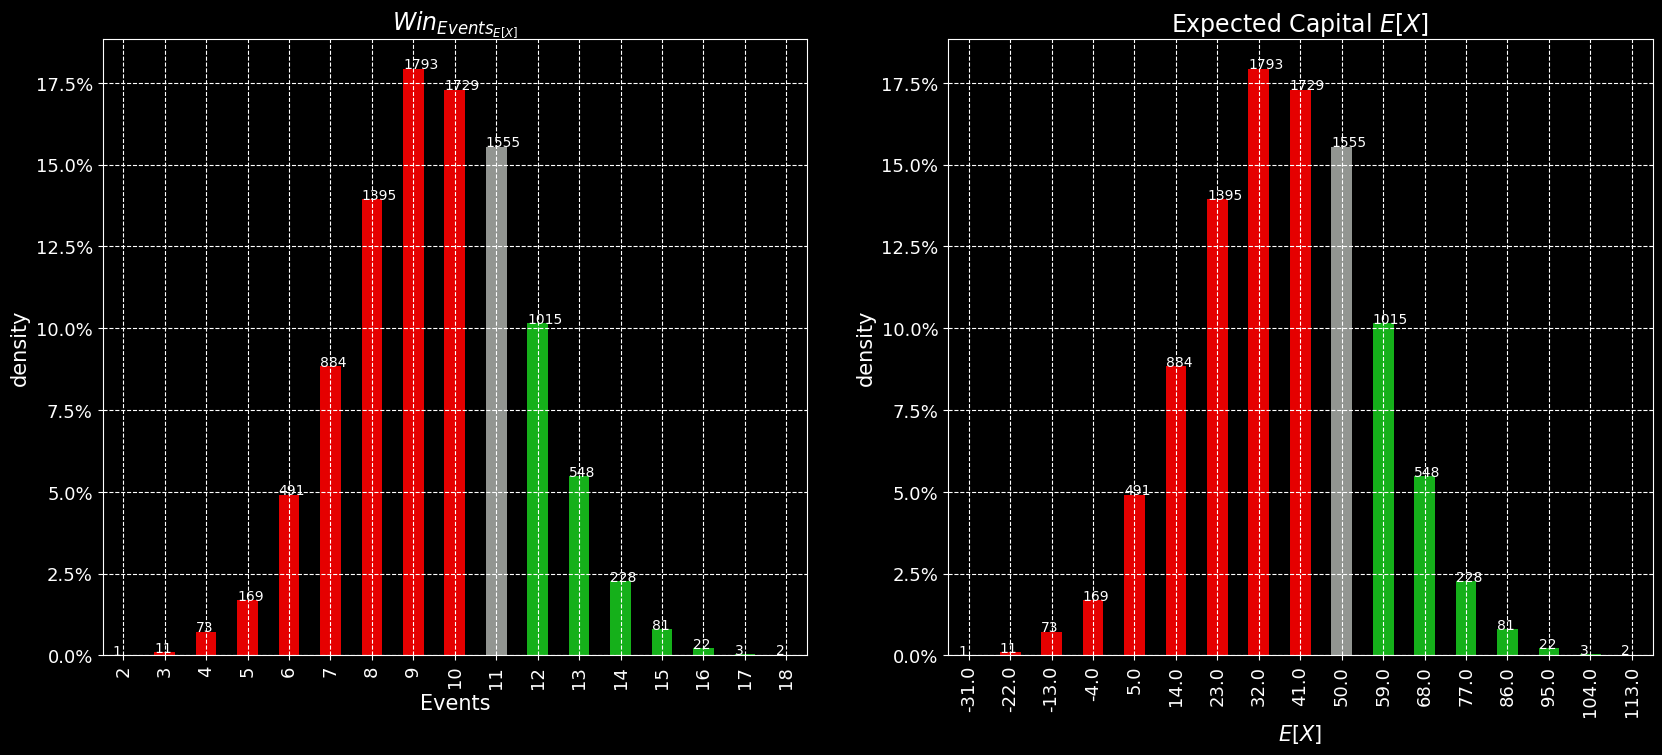

In [23]:
vs.bar_plots(dt.frequencies(pd.DataFrame(tosses))['frequency'], dt.frequencies(df1)['frequency'], 'Events', '$E[X]$', '$Win_{Events_{E[X]}}$', 'Expected Capital $E[X]$', 'bar_plot', 'jpg')

---
<font color= 'f00084'> Deactivate Venv <i>(if used)</i>: </font> 

<i>If you are using a venv it should be deactivated to pkg conflicts in other environments:</i>

In [17]:
# Exit the current shell session
!exit
# Deactivate the current virtual environment
#!deactivate
# Exit the current shell session
#!pipenv shell exit
# Deactivate the current virtual environment
#subprocess.run(["deactivate"], shell=True)

*see [input,output & error pipes](https://docs.python.org/3/library/subprocess.html#subprocess.Popen)*